In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
customers=pd.read_csv('/Users/1c/Downloads/archive-5/olist_customers_dataset.csv')
geo=pd.read_csv('/Users/1c/Downloads/archive-5/olist_geolocation_dataset.csv')
items=pd.read_csv('/Users/1c/Downloads/archive-5/olist_order_items_dataset.csv')
payments=pd.read_csv('/Users/1c/Downloads/archive-5/olist_order_payments_dataset.csv')
reviews=pd.read_csv('/Users/1c/Downloads/archive-5/olist_order_reviews_dataset.csv')
orders=pd.read_csv('/Users/1c/Downloads/archive-5/olist_orders_dataset.csv')
products=pd.read_csv('/Users/1c/Downloads/archive-5/olist_products_dataset.csv')
sellers=pd.read_csv('/Users/1c/Downloads/archive-5/olist_sellers_dataset.csv')
trans=pd.read_csv('/Users/1c/Downloads/archive-5/product_category_name_translation.csv')

![Database Schema](https://i.imgur.com/HRhd2Y0.png)

In [8]:
items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [11]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [13]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [14]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


<h3>此次分析將範圍縮小至 items, orders, products, customers, sellers 五個dataset

In [15]:
#items
items.info()#112650rows
items['order_id'].nunique()#98666rows
items['order_id'].value_counts().sort_values(ascending=False)
#重複原因有可能是訂單內某商品種類或購買數超過一個
items.groupby('order_id').agg({'order_item_id':'max',
                               'product_id':'nunique'}).sort_values('order_item_id',ascending=False)
items.groupby(['order_id', 'product_id']).agg({'order_item_id': 'count'}).sort_values('order_item_id',
                                                                                      ascending=False)
#計算total items
item_counts=items.groupby(['order_id','product_id'])['order_item_id'].count().reset_index(name='total_items')
items=items.merge(item_counts,on=['order_id','product_id'],how='left')
items1=items.drop('order_item_id',axis=1)
items1.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
items1.shape

(102425, 7)

In [19]:
#orders
orders.info()
orders['order_id'].nunique()#no duplicates
orders.loc[orders['order_approved_at'].isna()|
          orders['order_delivered_carrier_date'].isna()|
          orders['order_delivered_customer_date'].isna(),'order_status'].value_counts()#缺少值很少是delivered
orders.loc[~(orders['order_approved_at'].isna()|
          orders['order_delivered_carrier_date'].isna()|
          orders['order_delivered_customer_date'].isna()),'order_status'].value_counts()#delivered通常沒有缺少

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_status
delivered    96455
canceled         6
Name: count, dtype: int64

In [20]:
#products
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [21]:
#合併資料
main=pd.merge(orders,items,on='order_id',how='outer')
data=pd.merge(main,products,on='product_id',how='left')
df=data.copy()


<h1>資料清洗

In [22]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   order_item_id                  112650 non-null  float64
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
total_items                       775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                  793
product_length_cm                 793
product_height_cm                 793
product_width_cm                  793
dtype: int64

In [23]:
#轉換成時間
dates=['order_purchase_timestamp','order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date']
for date in dates:
    df[date]=pd.to_datetime(df[date])

In [27]:
#把類別名字換成英文
mapping=trans.set_index('product_category_name')['product_category_name_english'].to_dict()
df['product_category_name']=df['product_category_name'].replace(mapping)

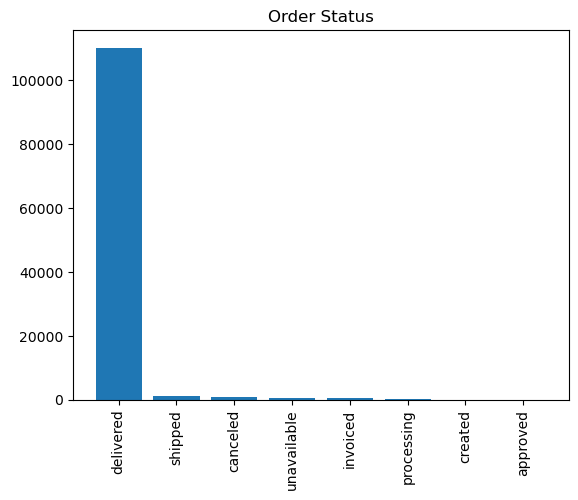

In [31]:
#清理時間缺失值
df[df['order_delivered_customer_date'].isna()]['order_status'].value_counts()
df[df['order_status']!='delivered']
#發現時間缺失值大多來自未完成的訂單
status=df['order_status'].value_counts()
plt.bar(status.index,status.values)
plt.xticks(rotation=90)
plt.title('Order Status')
plt.show()
#大部分的商品都有準時送達加上此部分不在分析範圍內->僅保留df['order_status']=='delivered'
df=df.loc[data['order_status']=='delivered']
df=df.dropna(subset=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'])

In [32]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
total_items                         0
product_category_name            1536
product_name_lenght              1536
product_description_lenght       1536
product_photos_qty               1536
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
dtype: int64

In [33]:
#清除產品類缺失值
df.loc[df['product_weight_g'].isna()].head()
#缺失值可能代表沒有敘述、標題、照片
df[['product_name_lenght',
    'product_photos_qty',
    'product_description_lenght']]=df[['product_name_lenght','product_photos_qty','product_description_lenght']].fillna(0)
df['product_category_name'].fillna('None',inplace=True)
df.dropna(subset=['product_weight_g'],axis=0,inplace=True)
df.isna().sum()
#缺失值清理完畢

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
total_items                      0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

<h1>資料分析

In [34]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_items,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,1.0,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,1.0,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [35]:
df.shape

(110155, 23)

In [61]:
df.resample('M', on='order_approved_at')['price'].sum()
#2016年以前的資料太少，以2017年以後的資料為分析重點
df1=df.loc[df['order_approved_at']>='2017']
df1.resample('M', on='order_approved_at')['price'].sum()

order_approved_at
2017-01-31    104954.10
2017-02-28    234163.38
2017-03-31    355285.21
2017-04-30    338004.85
2017-05-31    490517.21
2017-06-30    425708.55
2017-07-31    476478.89
2017-08-31    554983.46
2017-09-30    597061.93
2017-10-31    652987.87
2017-11-30    972486.88
2017-12-31    747390.69
2018-01-31    917667.20
2018-02-28    819355.27
2018-03-31    963604.25
2018-04-30    953526.94
2018-05-31    999867.28
2018-06-30    859396.90
2018-07-31    849351.12
2018-08-31    862639.54
Freq: M, Name: price, dtype: float64

<h3>銷售分析

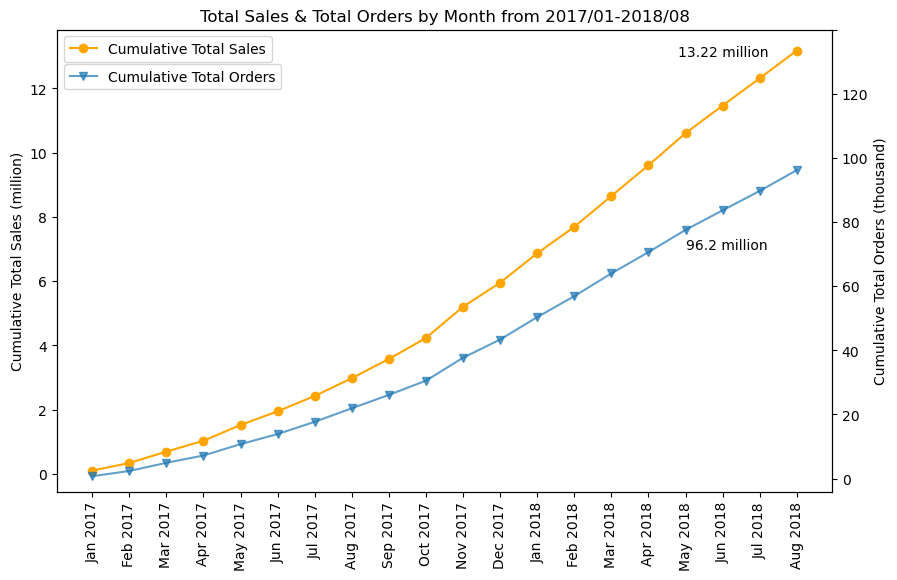

In [62]:
#總體銷售及訂單狀況(累積)
sales_cum=df1.resample('M', on='order_approved_at')['price'].sum().cumsum()/1000000
total_sales=round(df.resample('M', on='order_approved_at')['price'].sum().cumsum()[-1]/1000000,2)
order_cum=df1.resample('M', on='order_approved_at')['order_id'].nunique().cumsum()/1000
total_order=round(df1.resample('M', on='order_approved_at')['order_id'].nunique().cumsum()[-1]/1000,1)
mon=range(1,21)
monthly_ticks=pd.date_range(start='2017-01-01',end='2018-08-29',freq='MS')
fig,ax1=plt.subplots(figsize=(10,6))
ax2=ax1.twinx()
ax2.plot(mon,order_cum,label='Cumulative Total Orders',marker='v',alpha=0.7)
ax1.plot(mon,sales_cum,label='Cumulative Total Sales',color='orange',marker='o')
ax1.set_xticks(mon,monthly_ticks.strftime('%b %Y'),rotation=90)
ax2.set_yticks(range(0,141,20),[0,20,40,60,80,100,120,''])
ax2.set_ylabel('Cumulative Total Orders (thousand)')
ax1.set_ylabel('Cumulative Total Sales (million)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.94))
plt.title('Total Sales & Total Orders by Month from 2017/01-2018/08')
ax1.text(16.8,13,s=f'{total_sales} million')
ax1.text(17,7,s=f'{total_order} million')
plt.show()

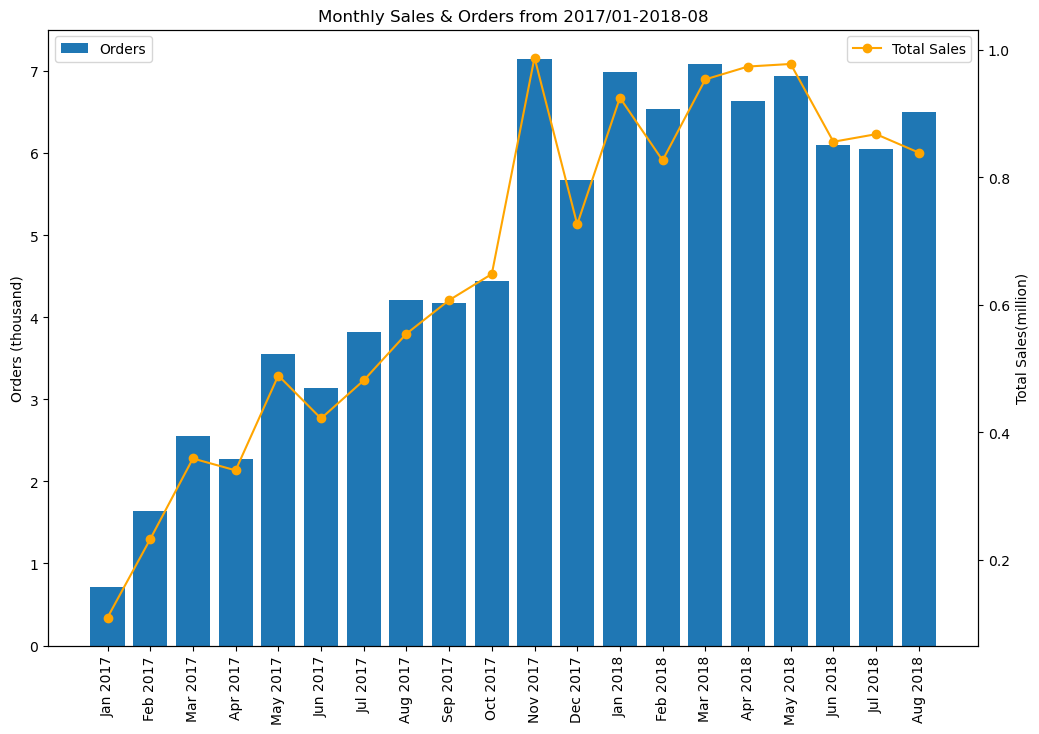

In [63]:
#每月銷售及訂單狀況
order_mon=df1.resample('M', on='order_approved_at')['order_id'].nunique()/1000
fig,ax1=plt.subplots(figsize=(12,8))
ax2=ax1.twinx()
ax1.bar(mon,order_mon,label='Orders')
ax1.set_xticks(mon,monthly_ticks.strftime('%b %Y'),rotation=90)
ax2.plot(mon,df1.resample('M', on='order_purchase_timestamp')['price'].sum()/1000000,
         label='Total Sales',color='orange',marker='o')
ax1.set_ylabel('Orders (thousand)')
ax2.set_ylabel('Total Sales(million)')
plt.xlabel('Date')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Monthly Sales & Orders from 2017/01-2018-08')
plt.show()

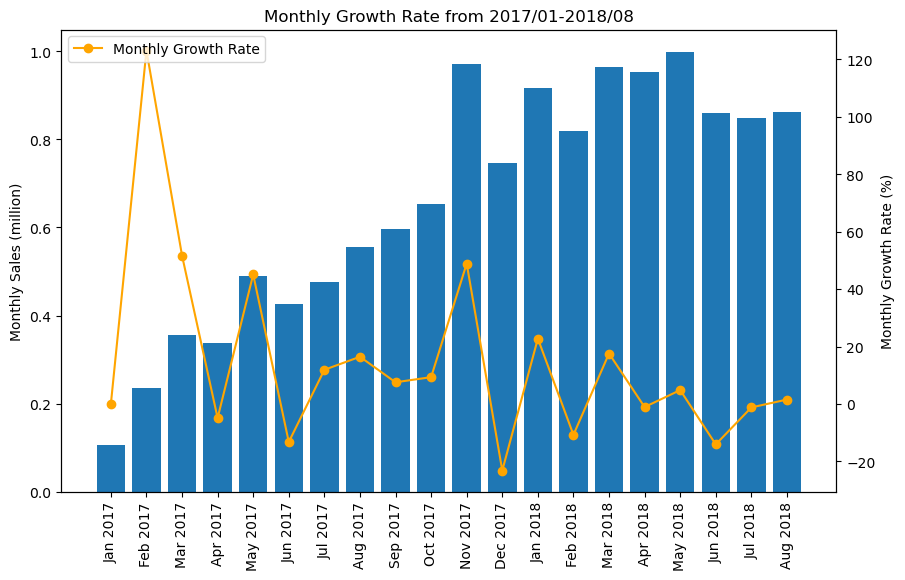

In [64]:
#銷售月增率
sales_bar=df1.resample('M', on='order_approved_at')['price'].sum()/1000000
growth_pct=[0]
for i in list(range(0,19)):
    pct=((sales_bar[i+1]/sales_bar[i])-1)*100
    growth_pct.append(pct)

fig,ax1=plt.subplots(figsize=(10,6))
ax2=ax1.twinx()
ax1.bar(mon,sales_bar,label='Monthly Sales')
ax2.plot(mon,growth_pct,color='orange',label='Monthly Growth Rate',marker='o')
plt.title('Monthly Growth Rate from 2017/01-2018/08')
ax1.set_ylabel('Monthly Sales (million)')
ax2.set_ylabel('Monthly Growth Rate (%)')
plt.legend(loc='upper left')
ax1.set_xticks(mon,monthly_ticks.strftime('%b %Y'),rotation=90)
plt.show()

<h3>產品類別分析

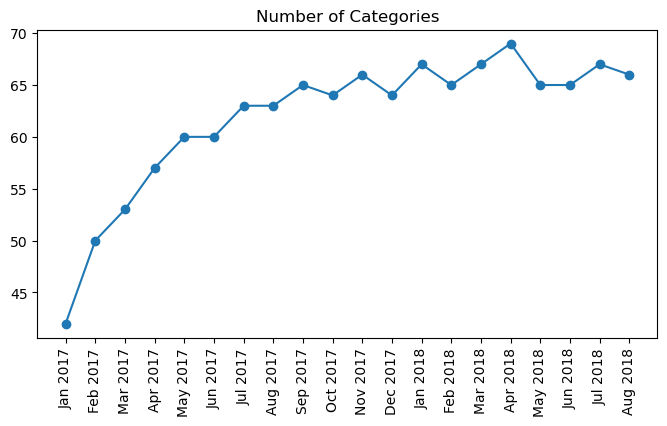

In [65]:
#類別數量
plt.figure(figsize=(8,4))
df1.resample('M', on='order_approved_at')['product_category_name'].nunique()
plt.plot(monthly_ticks.strftime('%b %Y'),
         df1.resample('M', on='order_approved_at')['product_category_name'].nunique(),
         marker='o')
plt.title('Number of Categories')
plt.xticks(rotation=90)
plt.show()

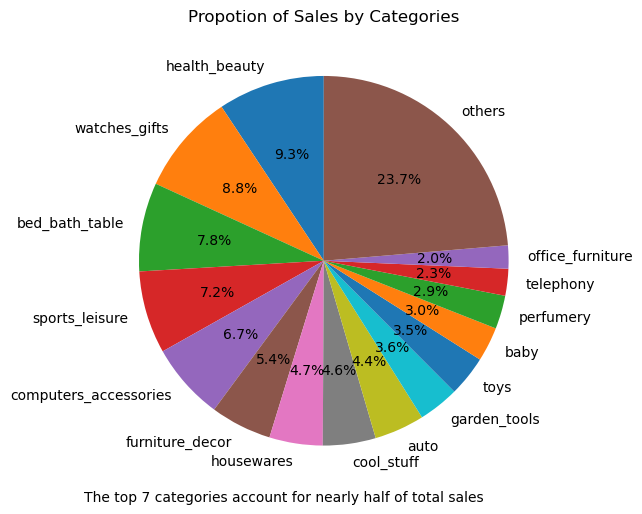

In [66]:
#了解各品類對整體銷售的佔比
top15_sales=round(df1.groupby('product_category_name')['price']
                  .sum().sort_values(ascending=False).head(15),0).astype(int).tolist()
others=round(df1.groupby('product_category_name')['price'].sum()
             .sort_values(ascending=False)[15:].sum(),0).astype(int)
top15_sales.append(others)
sales_index=df1.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(15).index.tolist()
sales_index.append('others')
plt.figure(figsize=(10,6))
plt.pie(top15_sales,labels=sales_index,autopct='%1.1f%%',startangle=90)
plt.title('Propotion of Sales by Categories')
plt.text(x=-1.3,y=-1.3,s='The top 7 categories account for nearly half of total sales')
plt.show()

<h3>類別vs銷售：前五大類別銷售狀況分析

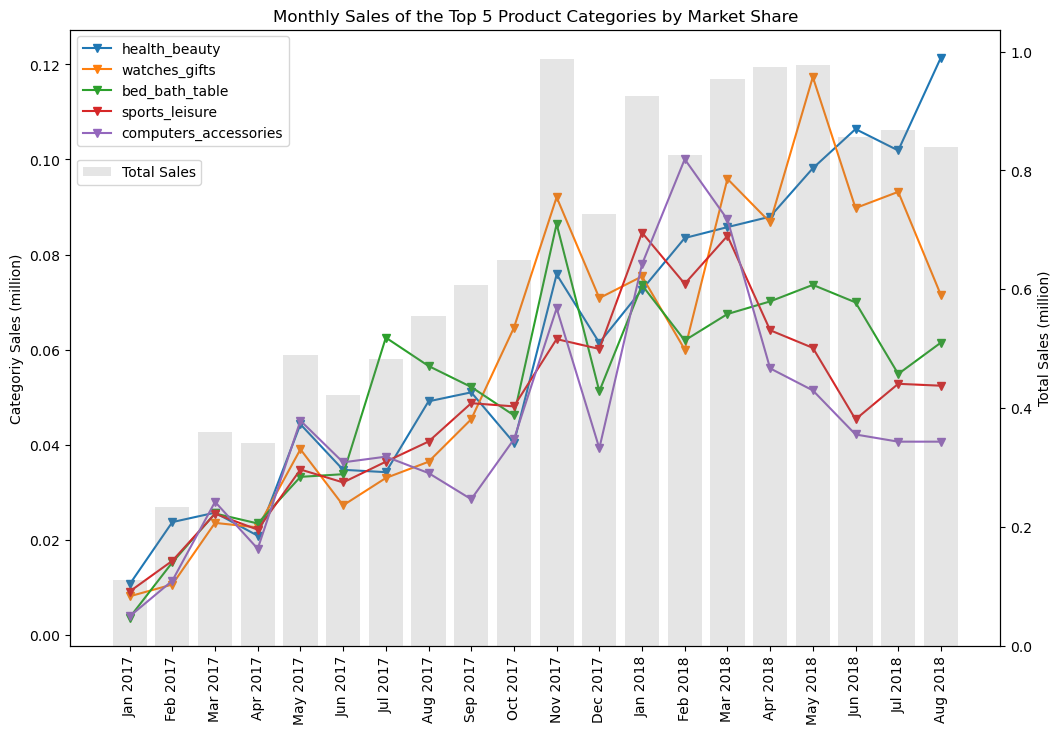

In [67]:
#前五大類別的每月銷售狀況
fig,ax1=plt.subplots(figsize=(12,8))
ax1.plot(mon,(df1[(df1['product_category_name']=='health_beauty')].resample('M', on='order_approved_at')['price'].sum()/1000000),label='health_beauty',marker='v')
ax1.plot(mon,(df1[(df1['product_category_name']=='watches_gifts')].resample('M', on='order_approved_at')['price'].sum()/1000000),label='watches_gifts',marker='v')
ax1.plot(mon,(df1[(df1['product_category_name']=='bed_bath_table')].resample('M', on='order_approved_at')['price'].sum()/1000000),label='bed_bath_table',marker='v')
ax1.plot(mon,(df1[(df1['product_category_name']=='sports_leisure')].resample('M', on='order_approved_at')['price'].sum()/1000000),label='sports_leisure',marker='v')
ax1.plot(mon,(df1[(df1['product_category_name']=='computers_accessories')].resample('M', on='order_approved_at')['price'].sum()/1000000),label='computers_accessories',marker='v')
ax2=ax1.twinx()
ax2.bar(mon,df1.resample('M', on='order_purchase_timestamp')['price'].sum()/1000000,
         label='Total Sales',color='gray',alpha=0.2)
ax1.legend()
ax2.legend()
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.8))
plt.title('Monthly Sales of the Top 5 Product Categories by Market Share')
ax1.set_ylabel('Categoriy Sales (million)')
ax2.set_ylabel('Total Sales (million)')
ax1.set_xticks(mon,monthly_ticks.strftime('%b %Y'),rotation=90)
plt.show()

<h3>訂單分析

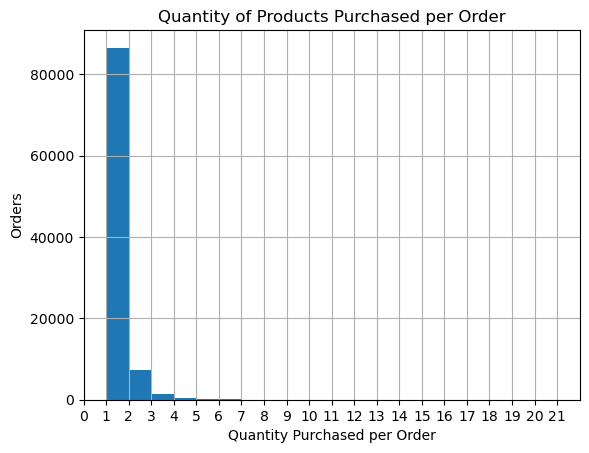

In [68]:
#每筆訂單商品購買數量
df1.groupby('order_id')['order_item_id'].max().hist(bins=20)
plt.xticks(range(0,22))
plt.xlabel('Quantity Purchased per Order')
plt.ylabel('Orders')
plt.title('Quantity of Products Purchased per Order')
plt.show()
#用戶每筆訂單通常只消費一個商品

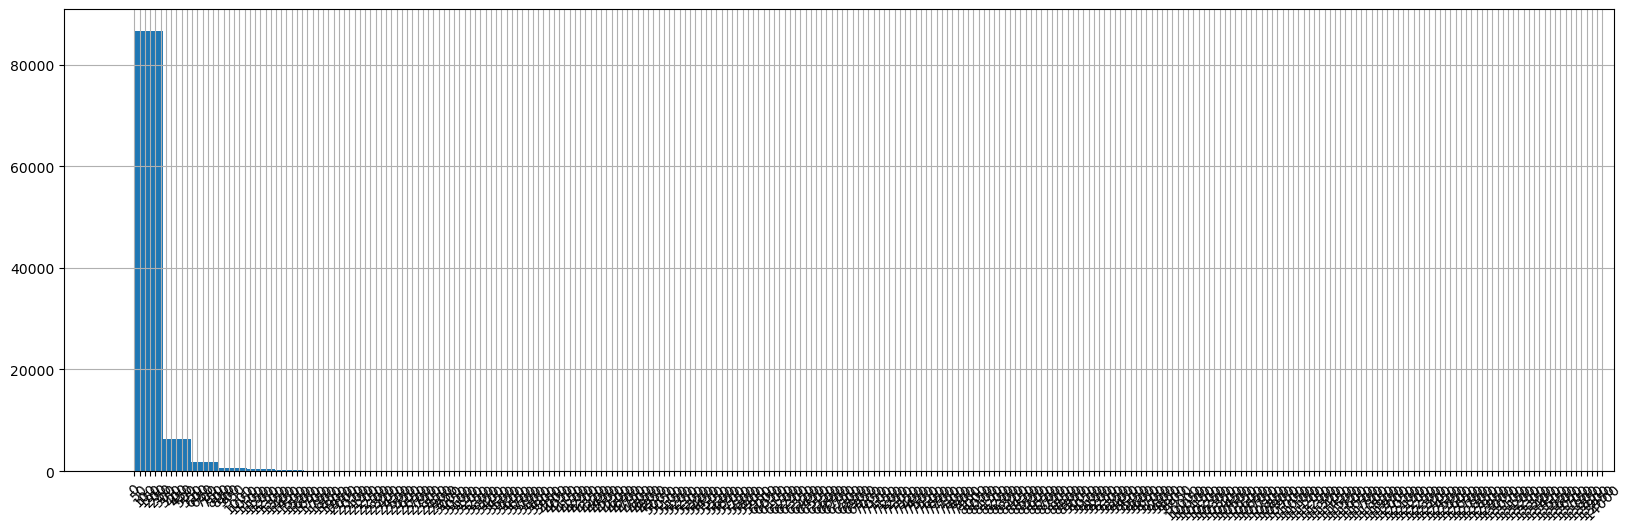

In [69]:
#大致觀察每筆訂單價格的分佈
plt.figure(figsize=(20,6))
df1.groupby('order_id')['price'].sum().sort_values(ascending=False).hist(bins=50)
plt.xticks(range(0,14001,50),rotation=45)
plt.show()
#極度右偏，對資料進行分組

In [70]:
order_totals=df1.groupby('order_id')['price'].sum().reset_index()
order_totals['price_bins']=pd.cut(order_totals['price'],bins=bins,labels=labels)
df1=pd.merge(df1,order_totals,on='order_id',how='left')
df1.rename({'price_x':'price'},axis=1,inplace=True)
order_value_total=df1.drop_duplicates('order_id').groupby('price_bins').agg({'price_y':'sum'})

In [73]:
order_value_total

,price_y
price_bins,
0-50,925857.98
50-100,2086550.98
100-200,3635903.19
200-500,3296438.67
500-1000,1769451.29
1000+,1461229.41


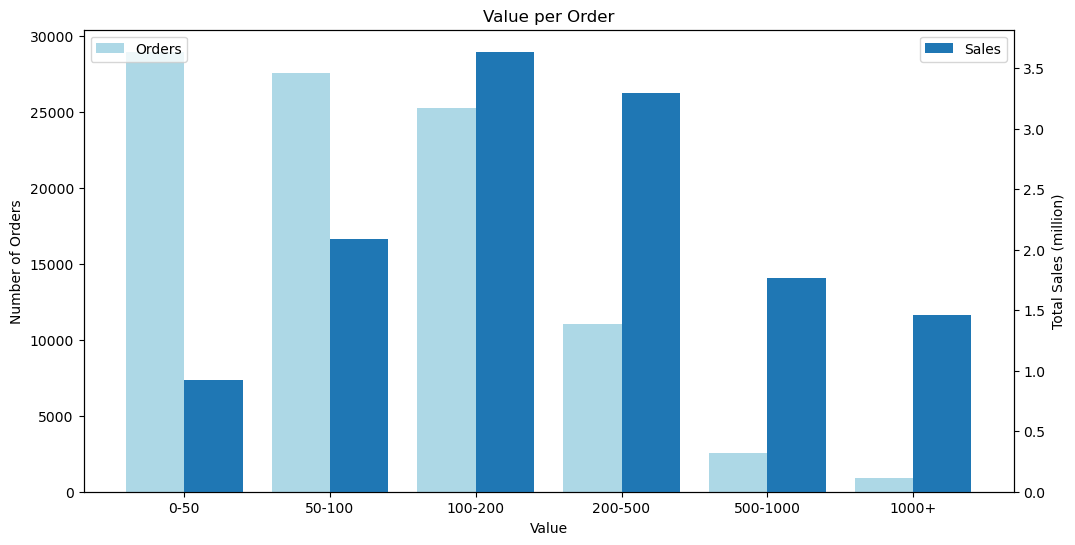

In [74]:
#資料分組後再查看價位分佈情形
bins=[0,50,100,200,500,1000,np.inf]
labels=['0-50','50-100','100-200','200-500','500-1000','1000+']
order_value_bins=pd.cut(df1.groupby('order_id')['price'].sum(),
                        bins=bins).sort_values(ascending=False).value_counts()
fig,ax1=plt.subplots(figsize=(12,6))
order_width=0.4
ax1.bar([i-0.2 for i in range(1,7)],order_value_bins,color='lightblue',width=order_width,label='Orders')
ax2=ax1.twinx()
ax2.bar([i+0.2 for i in range(1,7)],order_value_total['price_y']/1000000,
        width=order_width,label='Sales')
plt.xticks(range(1,7),labels,rotation=45)
ax1.set_ylabel('Number of Orders')
ax2.set_ylabel('Total Sales (million)')
ax1.set_xlabel('Value')
plt.title('Value per Order')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

<h3>訂單vs品類：前十大商品類別價位及銷售量分析

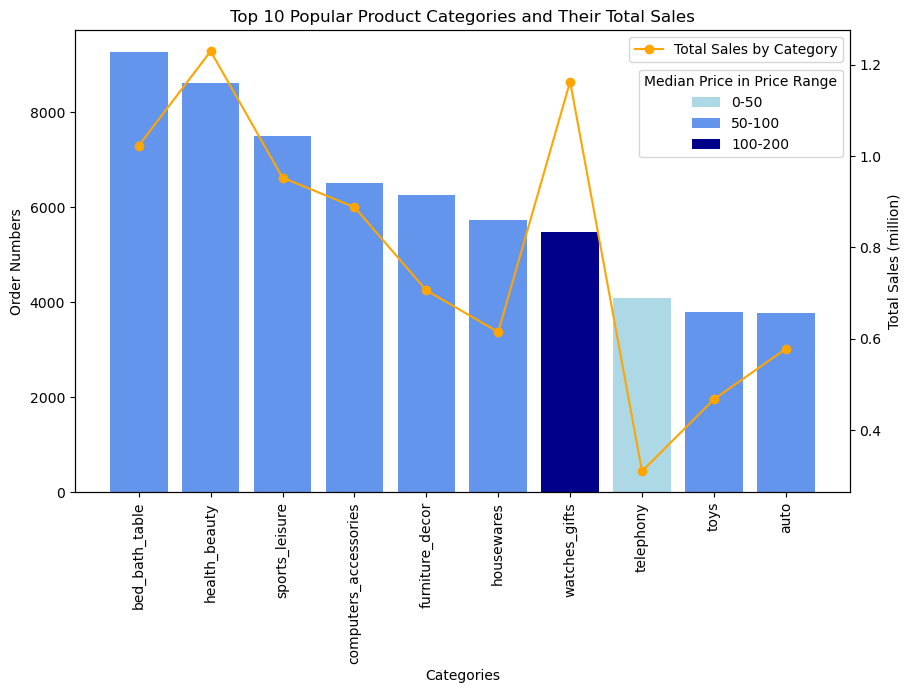

In [76]:
#前十大銷售量品類加上各品類的銷售訂單價格區間
top10_cat=df1.groupby('product_category_name')['order_id'].nunique().sort_values(ascending=False).head(10)
top10_cat.index
sales_cat=round(df1.groupby('product_category_name')['price'].sum().sort_values(ascending=False).loc[
    ['bed_bath_table', 'health_beauty', 'sports_leisure',
       'computers_accessories', 'furniture_decor', 'housewares',
       'watches_gifts', 'telephony', 'toys', 'auto']], 0)
cat_distribution=df1.drop_duplicates('order_id').groupby('product_category_name')['price_y'].median()
#各品類商品分佈也是右偏故用中位數
cat_distribution=pd.cut(cat_distribution,bins=bins,labels=labels)
color_mapping={'0-50':'lightblue','50-100':'cornflowerblue','100-200':'darkblue'}
bar_colors=[color_mapping[cat_distribution[cat]] for cat in top10_cat.index]

fig, ax1=plt.subplots(figsize=(10, 6))
ax1.bar(top10_cat.index, top10_cat, color=bar_colors,)
ax1.set_xlabel('Categories')
ax1.set_ylabel('Order Numbers')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.plot(sales_cat.index, sales_cat/1000000, color='orange',marker='o',label='Total Sales by Category')
ax2.legend()
ax2.set_ylabel('Total Sales (million)')
plt.title('Top 10 Popular Product Categories and Their Total Sales')
for label,color in color_mapping.items():
    ax1.bar(0, 0, color=color, label=label)
ax1.legend(title='Median Price in Price Range',bbox_to_anchor=(1, 0.93))
plt.show()

<h3>賣家分析

In [79]:
#賣家數量統計
seller_mon=df1.resample('M',on='order_approved_at')['seller_id'].nunique()
seller_mon_unique=df1.resample('M',on='order_approved_at')['seller_id'].unique()
seller_mon
#第一個月的非活躍賣家數
seller_counts=df1.drop_duplicates('order_id')['seller_id'].value_counts()
seller_index=seller_counts[seller_counts==1].index
len(set(seller_mon_unique['2017-01'][0].tolist()) & set(seller_index.tolist()))

12

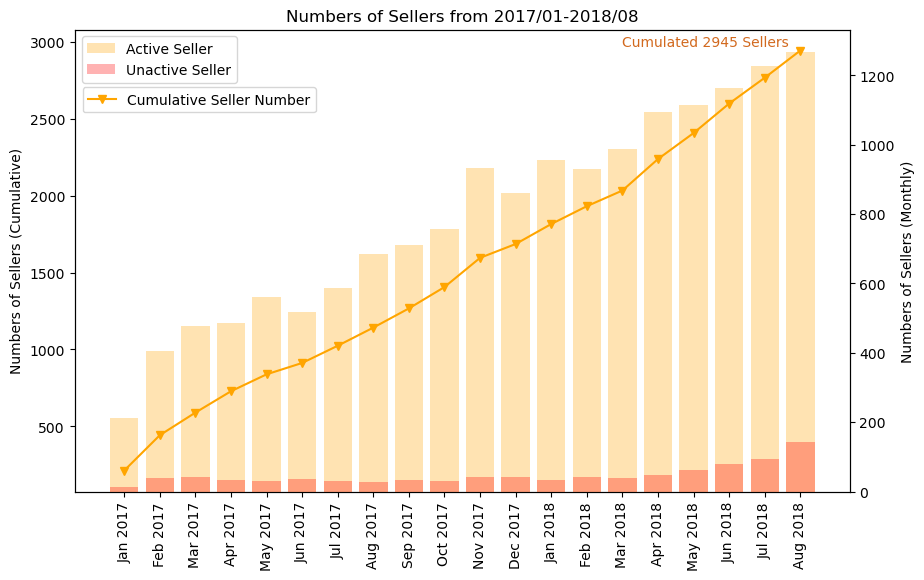

In [80]:
#調查平台累積賣家數量
#調查每月賣家數量並區分出非活躍賣家
#非活躍賣家＝僅在平台上出現一筆銷售紀錄
date_range=pd.date_range(start='2017-01-01',end='2018-08-29',freq='M')
mon=range(1,21)
seen_sellers=set()
cum_unique_sellers=[212]
total_sellers=0
unactive_sellers=[12]
for end in date_range:
    start=end.replace(day=1)
    end=end+pd.DateOffset(months=1)-pd.DateOffset(days=1)
    monthly_sellers=df1[(df1['order_approved_at']>=start)&(df1['order_approved_at']<=end)]['seller_id'].unique()
    new_sellers=set(monthly_sellers)-seen_sellers
    #cum_non_active_sellers.append(len(seen_sellers-set(monthly_sellers)))
    seen_sellers.update(new_sellers)
    total_sellers=len(seen_sellers)
    cum_unique_sellers.append(total_sellers)
    unactive=[seller for seller in monthly_sellers if seller in seller_index]
    unactive_sellers.append(len(unactive))
cum_unique_sellers

fig,ax1=plt.subplots(figsize=(10,6))
ax1.plot(mon,cum_unique_sellers,color='orange',marker='v',label='Cumulative Seller Number')
ax2=ax1.twinx()
ax2.bar(mon,seller_mon,color='orange',alpha=0.3,label='Active Seller')
ax2.bar(mon,unactive_sellers,color='red',alpha=0.3,label='Unactive Seller')
ax1.set_ylabel('Numbers of Sellers (Cumulative)')
ax2.set_ylabel('Numbers of Sellers (Monthly)')
ax1.set_xticks(mon,monthly_ticks.strftime('%b %Y'),rotation=90)
plt.text(15,1285,'Cumulated 2945 Sellers',color='chocolate')
ax1.legend(bbox_to_anchor=(0.32, 0.89))
ax2.legend()
plt.title('Numbers of Sellers from 2017/01-2018/08')
plt.show()

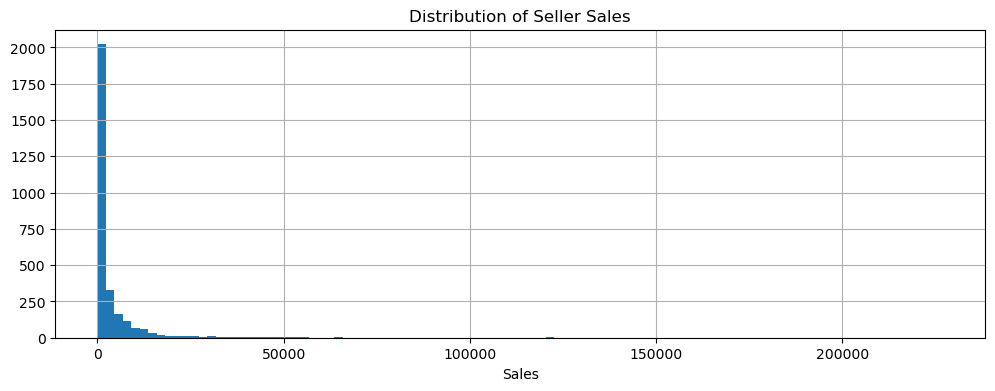

54438.2472

In [82]:
#前十大賣家
top10_sellers=df1.groupby('seller_id').agg({'price':'sum',
                              'product_category_name':'unique'}).sort_values('price',ascending=False).head(10)
top10_sellers_index=top10_sellers.index
top10_sellers
#調查賣家銷售額分佈
plt.figure(figsize=(12,4))
df1.groupby('seller_id')['price'].sum().hist(bins=100)
plt.xlabel('Sales')
plt.title('Distribution of Seller Sales')
plt.show()
df1.groupby('seller_id')['price'].sum().quantile(0.99)

In [86]:
#找出前十大賣家的商品主要類別
sellers_top=df1[
    df1['seller_id'].isin(top10_sellers_index)].groupby(['seller_id',
                                                         'product_category_name']).agg({'price':'sum'}).reset_index()
top10_seller_cat=[]
for seller in top10_sellers_index:
    sellers=sellers_top[sellers_top['seller_id'] == seller]
    sellers['pct']=sellers['price']/sellers['price'].sum()
    sellers['pct'].sort_values(ascending=False)
    print(seller)
    print(sellers[['product_category_name','pct']].sort_values('pct',ascending=False))
    top10_seller_cat.append(sellers.sort_values('pct',ascending=False)['product_category_name'].head(1).values[0])
#發現前十商家幾乎都專精在特定產品上（除了第十名）

4869f7a5dfa277a7dca6462dcf3b52b2
    product_category_name       pct
13          watches_gifts  0.875915
8              cool_stuff  0.042731
4                   audio  0.039788
10          health_beauty  0.018388
9             electronics  0.007532
7          consoles_games  0.007115
12              telephony  0.004616
6   computers_accessories  0.002467
11         sports_leisure  0.000745
5                    auto  0.000704
53243585a1d6dc2643021fd1853d8905
   product_category_name       pct
21             computers  0.749392
22             telephony  0.250608
4a3ca9315b744ce9f8e9374361493884
   product_category_name       pct
15        bed_bath_table  0.823879
19          home_confort  0.123399
17       furniture_decor  0.032024
20                  toys  0.016387
14                  baby  0.001750
18        home_comfort_2  0.001704
16            cool_stuff  0.000858
fa1c13f2614d7b5c4749cbc52fecda94
   product_category_name       pct
69         watches_gifts  0.989790
68        sports_

/var/folders/_k/522dpxk92713z35xntnykrt40000gn/T/ipykernel_33705/3113727878.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellers['pct']=sellers['price']/sellers['price'].sum()
/var/folders/_k/522dpxk92713z35xntnykrt40000gn/T/ipykernel_33705/3113727878.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellers['pct']=sellers['price']/sellers['price'].sum()
/var/folders/_k/522dpxk92713z35xntnykrt40000gn/T/ipykernel_33705/3113727878.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy o

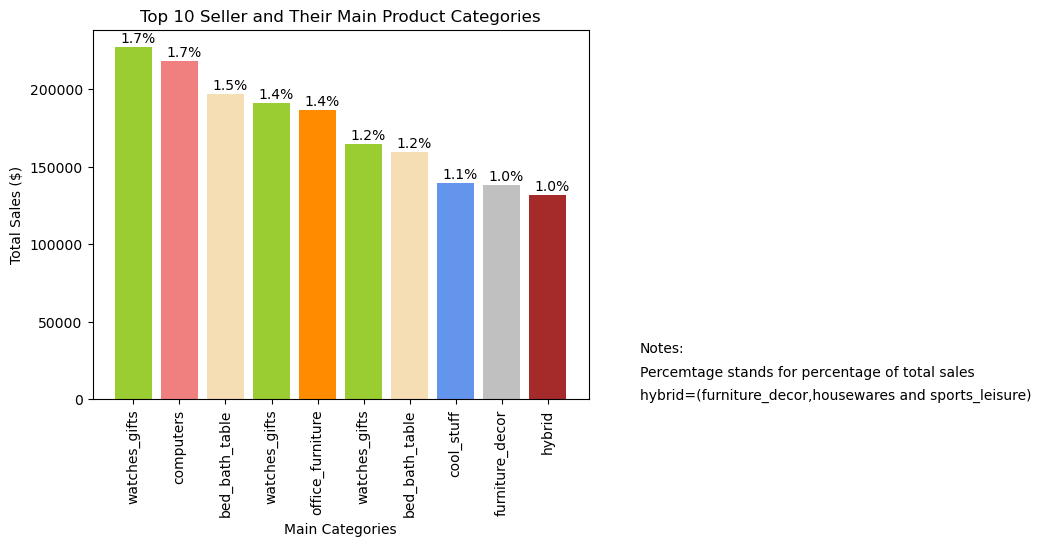

In [88]:
top10_seller_cat[-1]='hybrid'
top10_seller_cat
#視覺化前十大賣家及其主要商品品類
seller_color=['yellowgreen' if x in [1,4,6] 
              else 'wheat' if x in [3,7] 
              else 'lightcoral' if x in [2]
              else 'cornflowerblue' if x in [8]
              else 'darkorange' if x in [5]
              else 'silver' if x in [9]
              else 'brown' for x in range(1,11)]
plt.bar(range(1,11),top10_sellers['price'],color= seller_color)
plt.xticks(range(1,11),top10_seller_cat,rotation=90)
plt.xticks(rotation=90)
plt.title('Top 10 Seller and Their Main Product Categories')
plt.ylabel('Total Sales ($)')
plt.xlabel('Main Categories')
plt.text(12,30000,'Notes:')
plt.text(12,15000,'Percemtage stands for percentage of total sales')
plt.text(12,0,'hybrid=(furniture_decor,housewares and sports_leisure)')
pct_total=top10_sellers['price'].values*100/df1['price'].sum()
for i,value in enumerate(top10_sellers['price']):
    plt.text(i+1.1,value+1000,f'{pct_total[i]:.1f}%',ha='center',va='bottom')
plt.show()

<h3>用戶分析

In [91]:
df1['customer_id'].nunique()
df1['order_id'].nunique()
customers.head()
customers['customer_unique_id'].nunique()
df2=pd.merge(df1,customers,on='customer_id',how='left')
df2.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
total_items                      0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
price_y                          0
price_bins                       0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state      

In [95]:
#統計顧客成長及每月顧客人數，並區分一次性顧客及非一次性顧客
df2['customer_unique_id'].nunique()#93069總共用戶
customer_mon=df2.resample('M',on='order_approved_at')['customer_unique_id'].nunique()#共94889個（包含跨月重複）
customer_mon_unique=df2.resample('M',on='order_approved_at')['customer_unique_id'].unique()
customer_counts=df2.drop_duplicates('order_id')['customer_unique_id'].value_counts()
customer_index=customer_counts[customer_counts==1].index
custumor_over1_index=customer_counts[customer_counts!=1].index
customer_over1_mon=df2[df2['customer_unique_id'].isin(custumor_over1_index)].resample('M',on='order_approved_at')['customer_unique_id'].nunique()


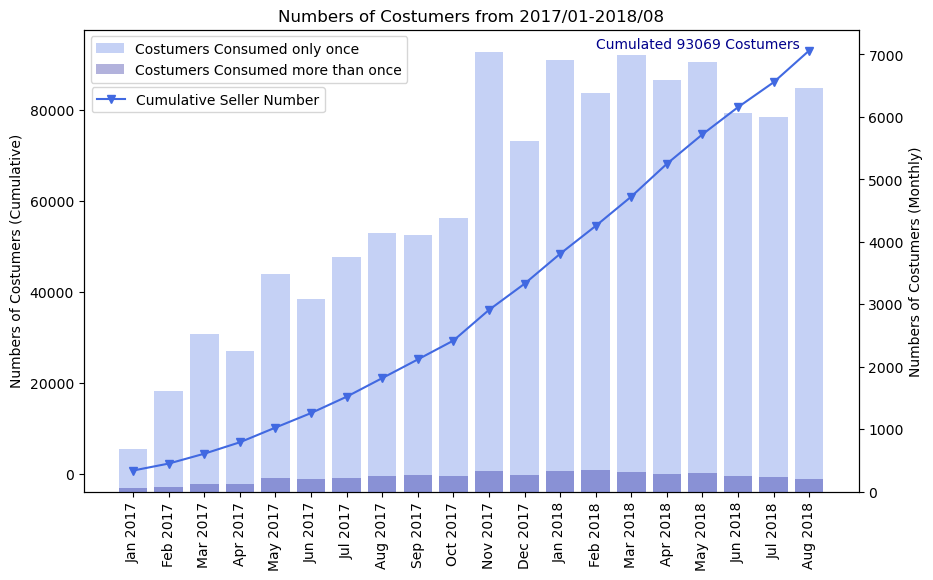

In [102]:
#調查平台累積用戶數量
#調查每月用戶數量並區分出非活躍用戶
#非活躍用戶＝僅在平台上出現一筆銷售紀錄
date_range=pd.date_range(start='2017-01-01',end='2018-08-29',freq='M')
seen_customer=set()
cum_unique_customer=[683]
total_customer=0

for end in date_range:
    start=end.replace(day=1)
    end=end+pd.DateOffset(months=1)-pd.DateOffset(days=1)
    monthly_customer=df2[(df2['order_approved_at']>=start)&(df2['order_approved_at']<=end)]['customer_unique_id'].unique()
    new_customer=set(monthly_customer)-seen_customer
    seen_customer.update(new_customer)
    total_customer=len(seen_customer)
    cum_unique_customer.append(total_customer)
    
cum_unique_customer

fig,ax1=plt.subplots(figsize=(10,6))
ax1.plot(mon,cum_unique_customer,color='royalblue',marker='v',label='Cumulative Seller Number')
ax2=ax1.twinx()
ax2.bar(mon,customer_mon,color='royalblue',alpha=0.3,label='Costumers Consumed only once')
ax2.bar(mon,customer_over1_mon,color='darkblue',alpha=0.3,label='Costumers Consumed more than once')
ax1.set_ylabel('Numbers of Costumers (Cumulative)')
ax2.set_ylabel('Numbers of Costumers (Monthly)')
ax1.set_xticks(mon,monthly_ticks.strftime('%b %Y'),rotation=90)
plt.text(14,7100,'Cumulated 93069 Costumers',color='darkblue')
ax1.legend(bbox_to_anchor=(0.32, 0.89))
ax2.legend()
plt.title('Numbers of Costumers from 2017/01-2018/08')
plt.show()

<h3>用戶使用時間分析

In [104]:
#找出用戶的消費時間習慣
df2['hour']=df1['order_purchase_timestamp'].dt.hour
df2['weekday']=df1['order_purchase_timestamp'].dt.weekday+1
df2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_items,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price_y,price_bins,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,hour,weekday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,29.99,0-50,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,10,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,118.70,100-200,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,20,2
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0,159.90,100-200,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,8,3
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,1.0,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,45.00,0-50,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,19,6
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,1.0,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0,19.90,0-50,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,21,2


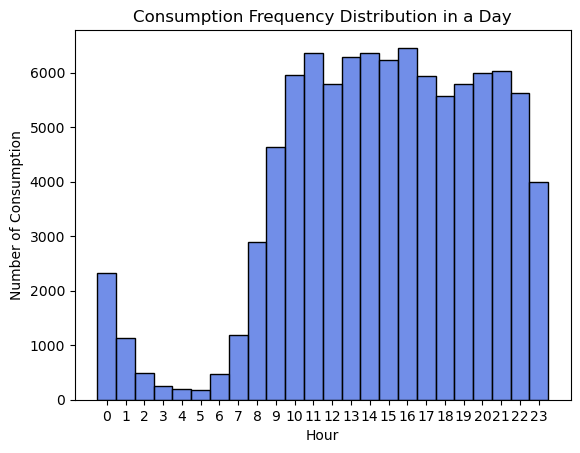

In [105]:
#顧客一天之中的消費次數分佈
sns.histplot(df2.drop_duplicates('order_id')['hour'],bins=24,color='royalblue',discrete=True)
plt.xticks(range(0,24))
plt.xlabel('Hour')
plt.ylabel('Number of Consumption')
plt.title('Consumption Frequency Distribution in a Day')
plt.show()

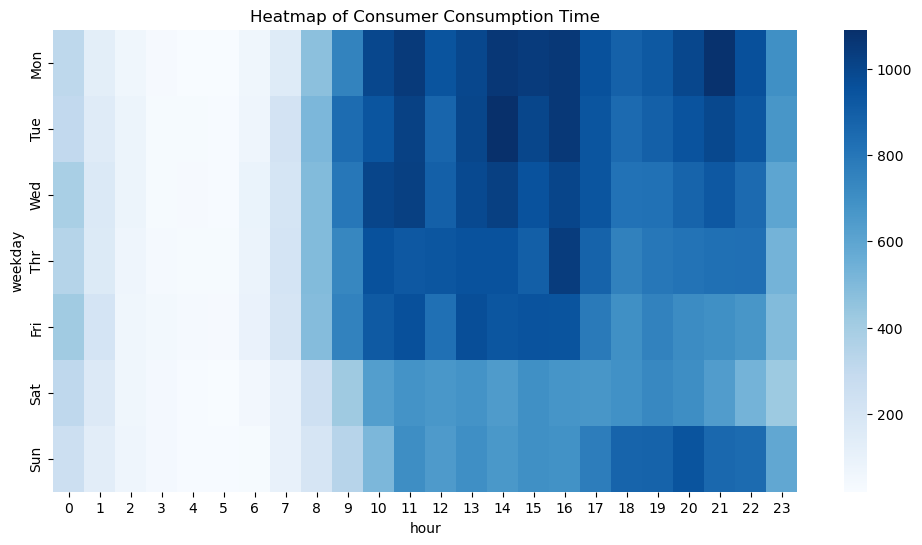

In [106]:
#顧客一週消費時間熱力圖
df_time=df2.drop_duplicates('order_id').sort_values('weekday')
df_heatmap=df_time.pivot_table(index='weekday',columns='hour',values='order_id',aggfunc='count')
plt.figure(figsize=(12,6))
sns.heatmap(df_heatmap.sort_index(),cmap='Blues', )
plt.yticks([i+0.5 for i in range(0,7)],['Mon','Tue','Wed','Thr','Fri','Sat','Sun'])
plt.xticks([i+0.5 for i in range(0,24)],range(0,24))
plt.title('Heatmap of Consumer Consumption Time')
plt.show()

<h3>議題分析：2017年11月銷售額大量上升原因

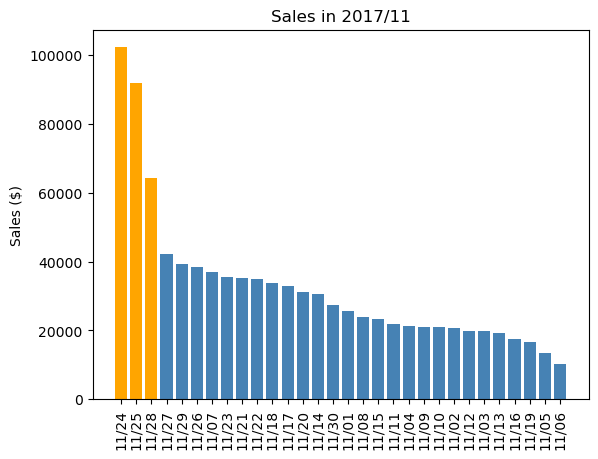

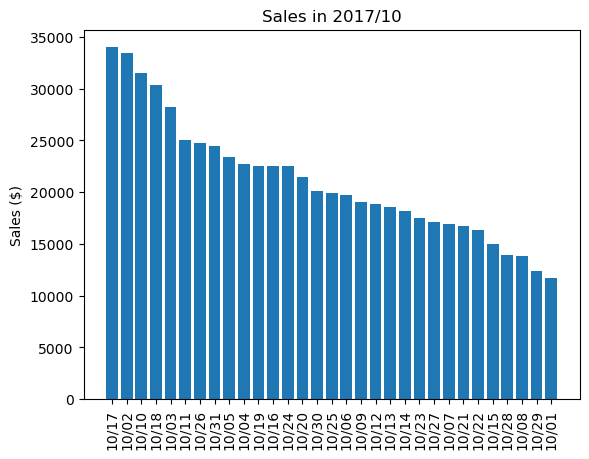

oct avg sales: 21064.12483870968
nov without thanksgiving avg sales: 27798.341428571428
growth rate without thanksgiving day : 31.970075383745524 %


In [111]:
#比較2017/10月2017/11月兩月每日銷售數據
day_range=pd.date_range(start='2017-11-01',end='2017-11-30',freq='D')
nov_2017_d=df1[(df1['order_approved_at']>='2017-11-01')&
    (df1['order_approved_at']<='2017-12-01')].groupby(df1['order_approved_at'].dt.to_period('D'))['price'].sum().sort_values(ascending=False)
plt.bar(range(1,31),nov_2017_d,color=['orange' if x in [1,2,3] else 'steelblue' for x in range(1,31)])
plt.xticks(range(1,31),nov_2017_d.index.strftime('%m/%d'),rotation=90)
plt.ylabel('Sales ($)')
plt.title('Sales in 2017/11')
plt.show()
oct_2017_d=df1[(df1['order_approved_at']>='2017-10-01')&
    (df1['order_approved_at']<='2017-11-01')].groupby(df1['order_approved_at'].dt.to_period('D'))['price'].sum().sort_values(ascending=False)
plt.bar(range(1,32),oct_2017_d)
plt.xticks(range(1,32),oct_2017_d.index.strftime('%m/%d'),rotation=90)
plt.ylabel('Sales ($)')
plt.title('Sales in 2017/10')
plt.show()
print('oct avg sales:',oct_2017_d.mean())
print('nov without thanksgiving avg sales:',nov_2017_d[2:].mean())
print('growth rate without thanksgiving day :',((nov_2017_d[2:].mean()/oct_2017_d.mean())-1)*100,'%')

In [114]:
#這段期間各品類表現
monthly_sales=df1.groupby(df1['order_approved_at'].dt.to_period('M'))['price'].sum()
change_rate=(monthly_sales['2017-11']-monthly_sales['2017-10'])/monthly_sales['2017-10']*100
change_rate
monthly_cat_sales=df1.groupby([df1['order_approved_at'].dt.to_period('M'),'product_category_name'])['price'].sum()
category_change_rate=((monthly_cat_sales.loc['2017-11']-monthly_cat_sales.loc['2017-10'])/monthly_cat_sales.loc['2017-10'])*100

print('positive growth:',f'{len(category_change_rate[category_change_rate>0])} Categories') #全部種類中只有一半左右的營收成長>0，非平台帶來的整體效應
print('cat growth better than total growth:',f'{len(category_change_rate[category_change_rate>change_rate])} Categories')#找出表現得比總體營收還要好的類別
category_change_rate[category_change_rate>change_rate].sort_values(ascending=False)


positive growth: 44 Categories
cat growth better than total growth: 30 Categories


product_category_name
party_supplies                             517.343977
fashion_underwear_beach                    507.933972
construction_tools_lights                  339.896000
cds_dvds_musicals                          333.333333
agro_industry_and_commerce                 315.860465
furniture_living_room                      293.658623
books_general_interest                     283.696346
tablets_printing_image                     253.939394
cine_photo                                 250.724638
christmas_supplies                         228.161319
electronics                                179.580288
construction_tools_construction            164.385493
musical_instruments                        145.556195
home_appliances                            136.969440
home_appliances_2                          130.718016
stationery                                 114.510551
furniture_decor                            110.970928
housewares                                 106.193284
constr

significant growth: 11 Categories


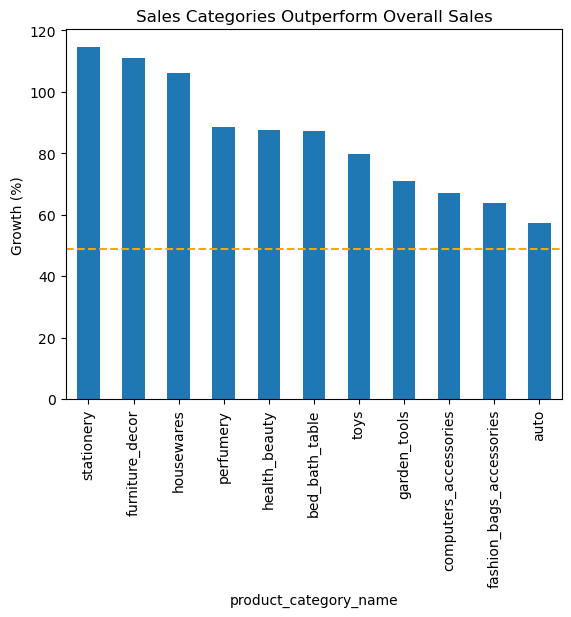

total sales growth: 48.928781785793355


In [117]:
#去除影響營收較小的類別
cat_share_oct= monthly_cat_sales.loc['2017-10']/monthly_sales['2017-10']
significant=cat_share_oct[cat_share_oct>=0.01].index
significant_categort_change=category_change_rate[significant][category_change_rate>change_rate]
print('significant growth:',f'{len(significant_categort_change)} Categories')
significant_categort_change.sort_values(ascending=False).plot(kind='bar')
plt.axhline(y=change_rate, color='orange', linestyle='--')#total sales growth
plt.title("Sales Categories Outperform Overall Sales")
plt.ylabel('Growth (%)')
plt.show()
print('total sales growth:',change_rate)

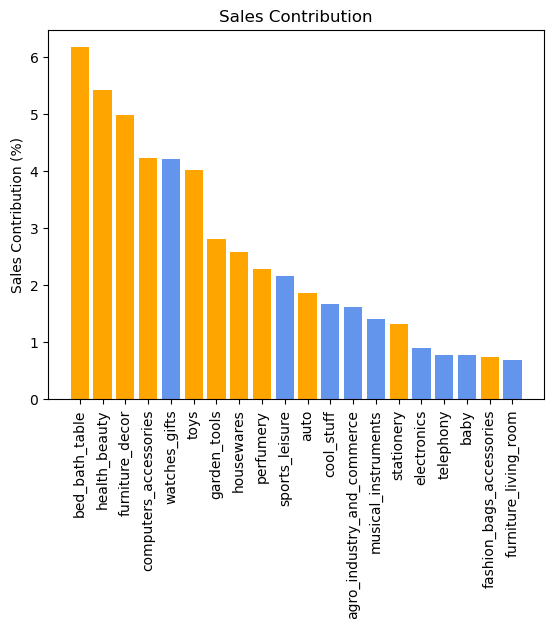

In [118]:
#在總體營收成長的佔比中，各品類對於營收成長的貢獻度
#橘色代表類別出現在上圖中的品類
sales_growth_contribution=((monthly_cat_sales.loc['2017-11']-
                           monthly_cat_sales.loc['2017-10'])/monthly_sales['2017-10'])*100
top20_sales_growth_contribution=sales_growth_contribution.sort_values(ascending=False).head(20)
plt.bar(top20_sales_growth_contribution.index,top20_sales_growth_contribution,
       color=['cornflowerblue' if cat not in significant_categort_change 
              else 'orange' for cat in top20_sales_growth_contribution.index])
plt.xticks(rotation=90)
plt.title('Sales Contribution')
plt.ylabel('Sales Contribution (%)')
plt.show()

<h3>議題分析：商品類別潛力分析

telephony


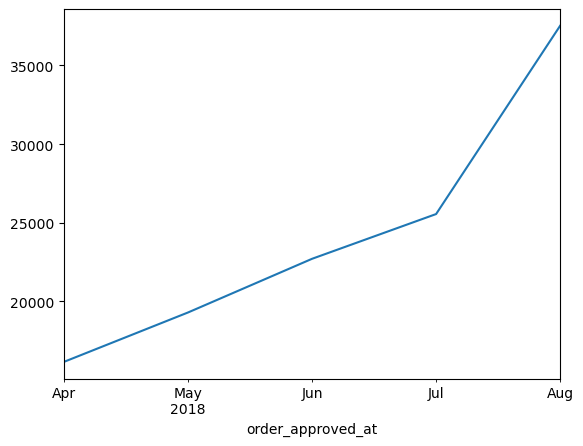

telephony


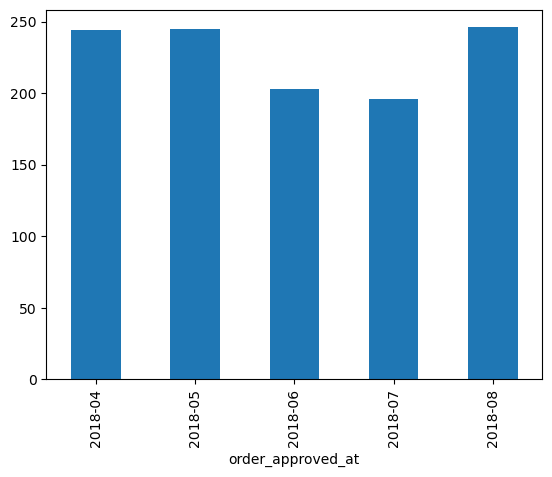

construction_tools_construction


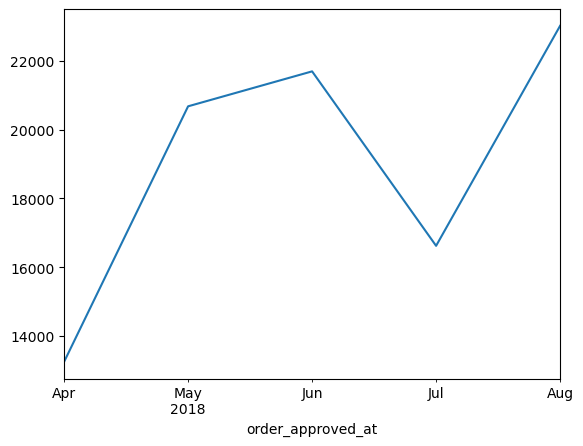

construction_tools_construction


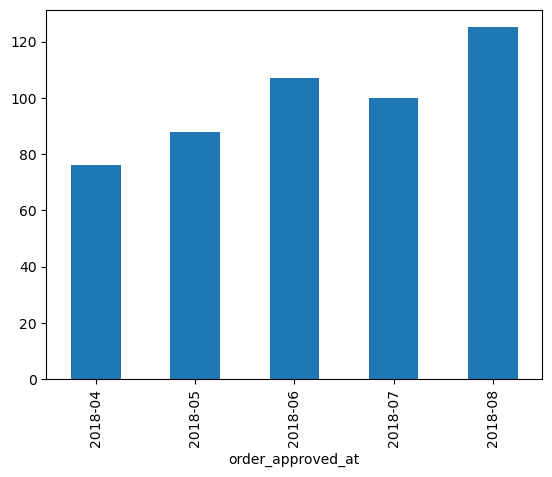

housewares


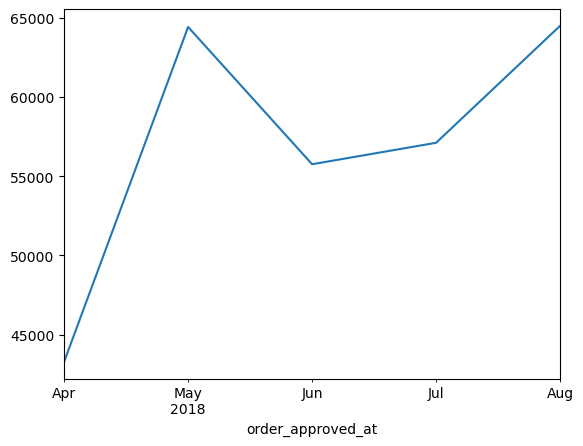

housewares


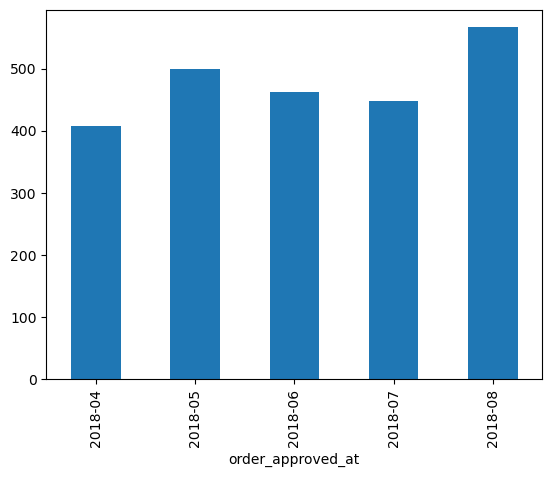

perfumery


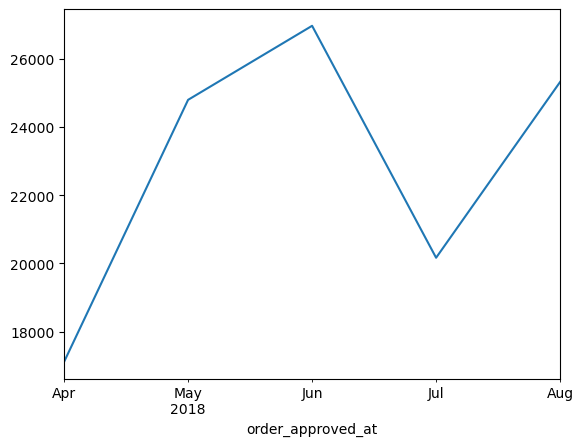

perfumery


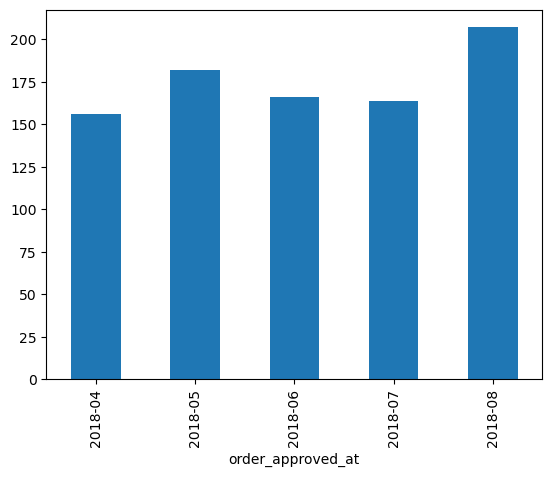

stationery


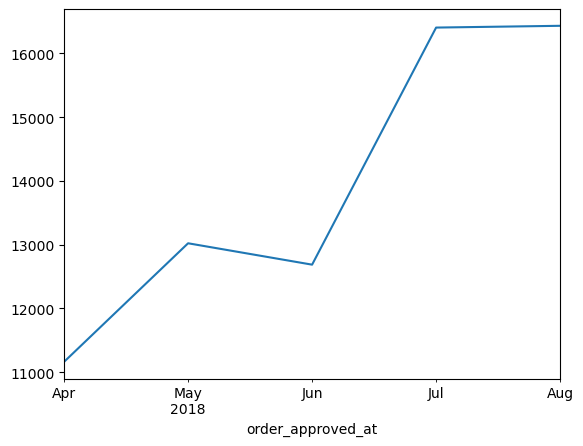

stationery


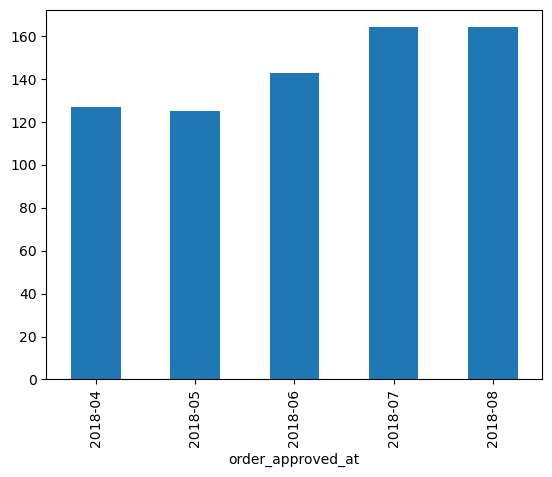

pet_shop


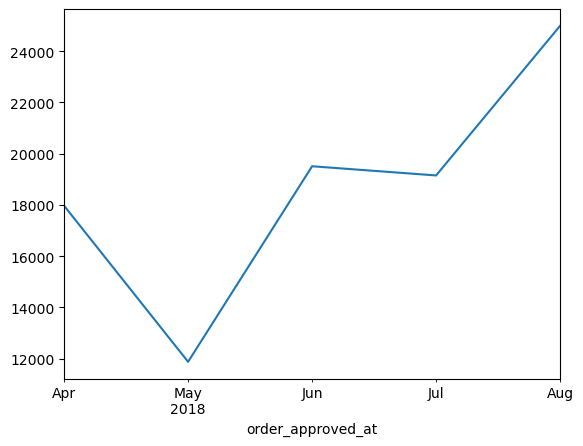

pet_shop


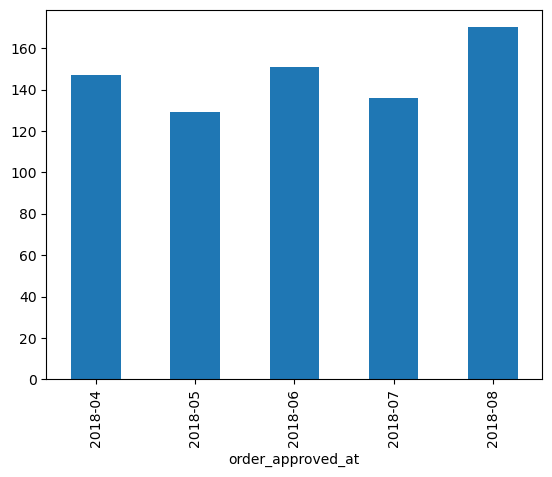

health_beauty


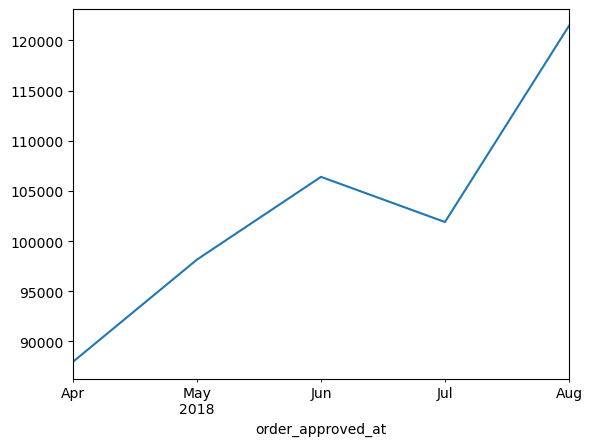

health_beauty


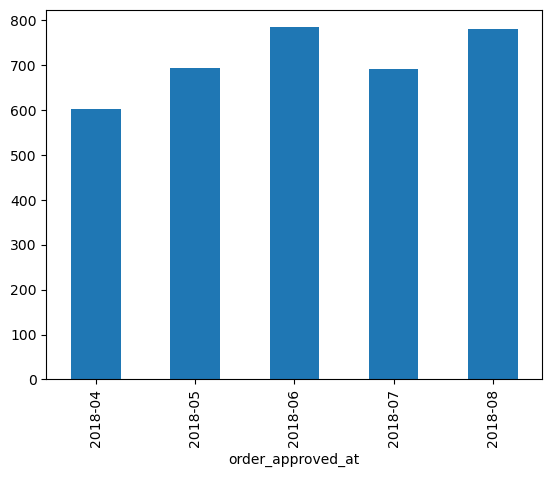

electronics


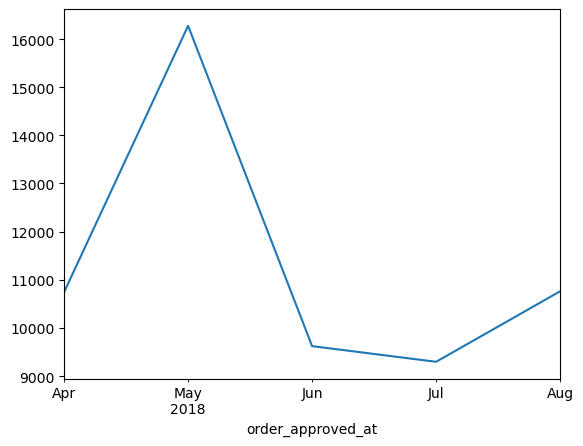

electronics


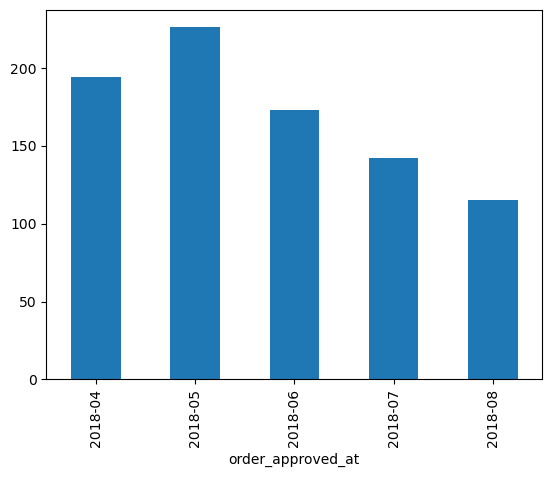

In [125]:
# 找出潛力商品：
# 1.近五個月成長幅度高 
# 2.去除因為產品基數小導致成長率容易飆高 
# 3.產品銷售量也有所成長（並非靠異常高單價衝高）
# 4.波動性（排除單月暴漲或營收波動過大）

#排除銷售基數太小的類別
threshold=(monthly_cat_sales['2018-04']/monthly_sales['2018-04']).sort_values(ascending=False).head(50)
threshold=threshold[threshold>=0.01]
threshold#26個

#找出近五個月銷售額有成長的
potential=(monthly_cat_sales['2018-08']/monthly_cat_sales['2018-04'])[threshold.index].sort_values(ascending=False)
potential_cat=potential[potential>1].index
potential[potential>1]#8個

#檢查各類別的每月銷售額及銷售量情形
for cat in potential_cat:
    print(cat)
    df1[(df1['product_category_name']==cat)&
                (df1['order_approved_at']>='2018-04')].groupby(df1['order_approved_at'].dt.to_period('M'))['price'].sum().plot()
    plt.show()
    print(cat)
    df1[(df1['product_category_name']==cat)&
                (df1['order_approved_at']>='2018-04')].groupby(df1['order_approved_at'].dt.to_period('M'))['order_id'].nunique().plot(kind='bar')
    
    plt.show()
#淘汰eletronic,perfumery

In [126]:
potential_products=potential_cat.drop(['electronics','perfumery','stationery'])
potential_products

Index(['telephony', 'construction_tools_construction', 'housewares',
       'pet_shop', 'health_beauty'],
      dtype='object', name='product_category_name')

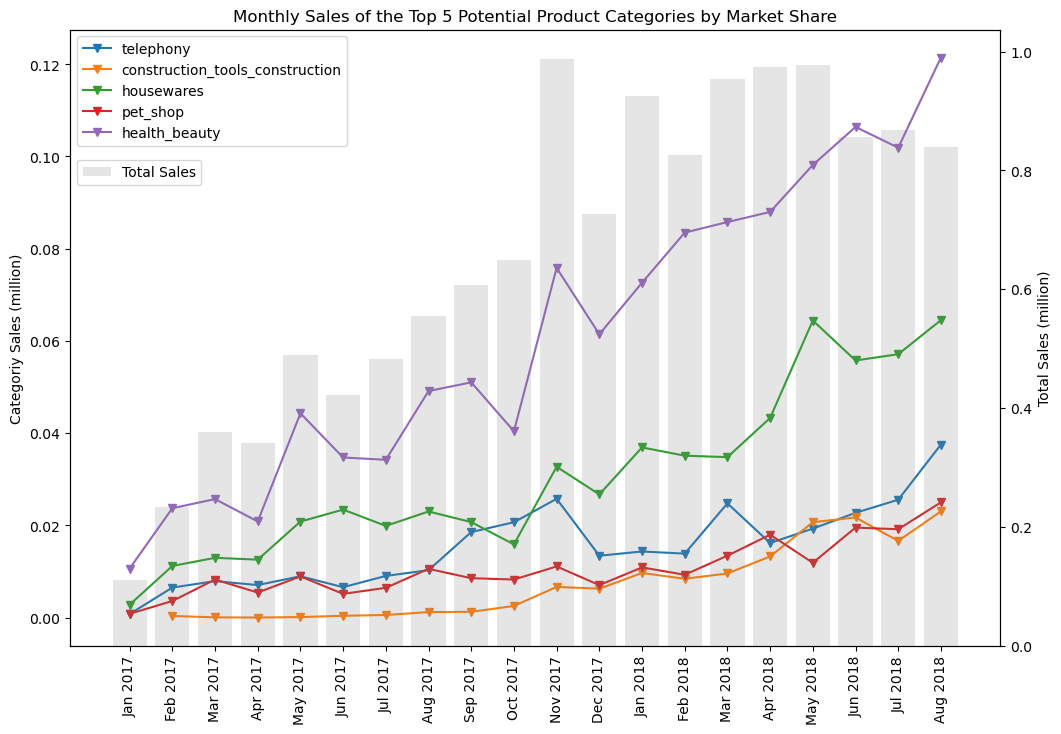

In [127]:
fig,ax1=plt.subplots(figsize=(12,8))
ax1.plot(mon,(df1[(df1['product_category_name']=='telephony')].resample('M', on='order_approved_at')['price'].sum()/1000000),label='telephony',marker='v')
ax1.plot(range(2,21),(df1[(df1['product_category_name']=='construction_tools_construction')].resample('M', on='order_approved_at')['price'].sum()/1000000),label='construction_tools_construction',marker='v')
ax1.plot(mon,(df1[(df1['product_category_name']=='housewares')].resample('M', on='order_approved_at')['price'].sum()/1000000),label='housewares',marker='v')
ax1.plot(mon,(df1[(df1['product_category_name']=='pet_shop')].resample('M', on='order_approved_at')['price'].sum()/1000000),label='pet_shop',marker='v')
ax1.plot(mon,(df1[(df1['product_category_name']=='health_beauty')].resample('M', on='order_approved_at')['price'].sum()/1000000),label='health_beauty',marker='v')

ax2=ax1.twinx()
ax2.bar(mon,df1.resample('M', on='order_purchase_timestamp')['price'].sum()/1000000,
         label='Total Sales',color='gray',alpha=0.2)
ax1.legend()
ax2.legend()
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.8))
plt.title('Monthly Sales of the Top 5 Potential Product Categories by Market Share')
ax1.set_ylabel('Categoriy Sales (million)')
ax2.set_ylabel('Total Sales (million)')
ax1.set_xticks(mon,monthly_ticks.strftime('%b %Y'),rotation=90)
plt.show()
#發現stationery五個月以前的銷量比現在的銷量多很多，不符合潛力商品定義

<h3>議題分析：賣家潛力分析

In [145]:
#潛力商家：1.成長率 2.持續成長 3.淘汰基數過低 4.淘汰波動性太高的
seller_sales=df1[(df1['order_approved_at']>='2018-04')&
                 (df1['order_approved_at']<'2018-05')].groupby('seller_id').agg({'price':'sum'})
seller_sales['price2']=df1[(df1['order_approved_at']>='2018-05')&
    (df1['order_approved_at']<'2018-06')].groupby('seller_id').agg({'price':'sum'})
seller_sales['price3']=df1[(df1['order_approved_at']>='2018-06')&
    (df1['order_approved_at']<'2018-07')].groupby('seller_id').agg({'price':'sum'})
seller_sales['price4']=df1[(df1['order_approved_at']>='2018-07')&
    (df1['order_approved_at']<'2018-08')].groupby('seller_id').agg({'price':'sum'})
seller_sales['price5']=df1[(df1['order_approved_at']>='2018-08')].groupby('seller_id').agg({'price':'sum'})
seller_sales['total']=seller_sales[['price','price2','price3','price4','price5']].sum(axis=1)
seller_sales
seller_sales['growth']=seller_sales['price5']-seller_sales['price']
seller_sales['growth_pct']=((seller_sales['price5']/seller_sales['price'])-1)*100
seller_sales.sort_values('growth_pct',ascending=False).head(20)
seller_sales.shape

#先把有0的月份的去除，因為不符合持續成長
seller_sales.dropna(axis=0,inplace=True)
seller_sales.sort_values(['growth'],ascending=False)
potential_sellers=seller_sales[(seller_sales['growth']>0)&(seller_sales['growth_pct']>=100)]#找出銷售有成長的
print(potential_sellers.describe())#找出潛力商家的篩選標準

potential_sellers1=potential_sellers[(potential_sellers['growth']>=500)&
                                    (potential_sellers['total']>=potential_sellers['total'].median())].sort_values(['growth_pct'],ascending=False)

             price       price2        price3        price4        price5  \
count    82.000000    82.000000     82.000000     82.000000     82.000000   
mean    366.517073  1003.992439   1097.820000   1079.762195   1239.912317   
std     768.904798  1434.758137   1813.263688   1776.479145   1818.827336   
min       7.990000    16.000000      8.900000     16.900000     55.200000   
25%      85.575000   200.725000    190.965000    185.775000    349.100000   
50%     166.200000   465.000000    506.445000    542.100000    661.435000   
75%     284.700000   996.625000   1163.500000   1213.460000   1495.222500   
max    6152.000000  6733.000000  11369.000000  12813.000000  13593.000000   

              total       growth   growth_pct  
count     82.000000    82.000000    82.000000  
mean    4788.004024   873.395244   512.202578  
std     7040.768637  1153.861407  1075.497382  
min      114.900000    37.400000   100.000000  
25%     1399.675000   239.997500   150.639241  
50%     2545.80000

0
5670f4db5b62c43d542e1b2d56b0cf7c


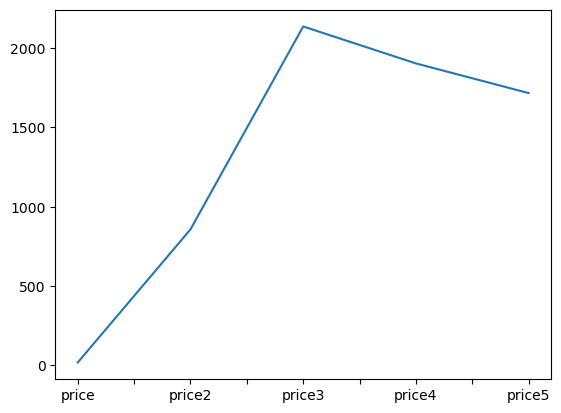

1
709e16e2b25c7474d980076c6bfc4806


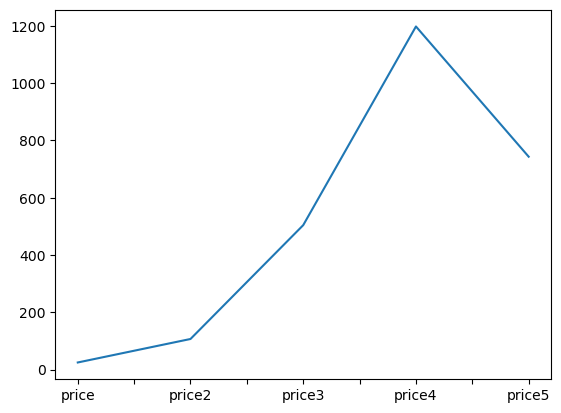

2
289cdb325fb7e7f891c38608bf9e0962


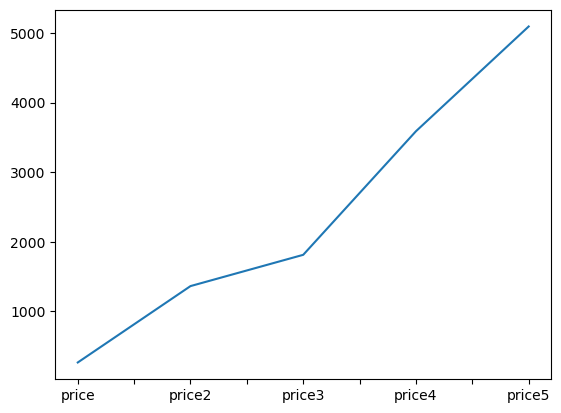

3
eeb6de78f79159600292e314a77cbd18


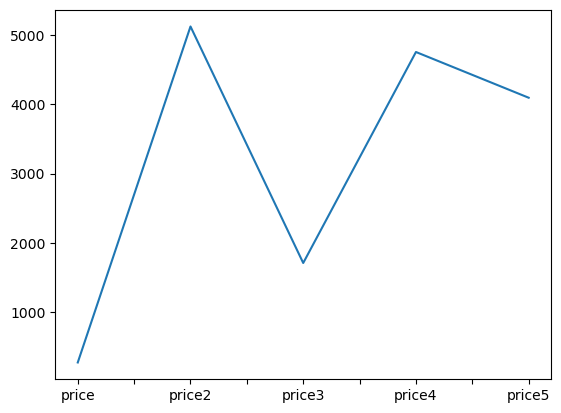

4
594f9aaa48e5bf431f011ddc5669b0d5


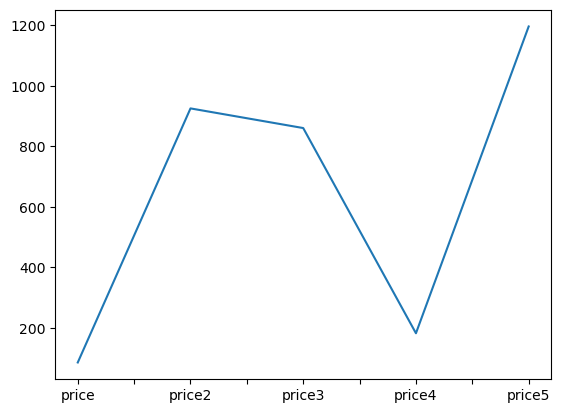

5
ea67327e24487bdfac5fbfa37ea124df


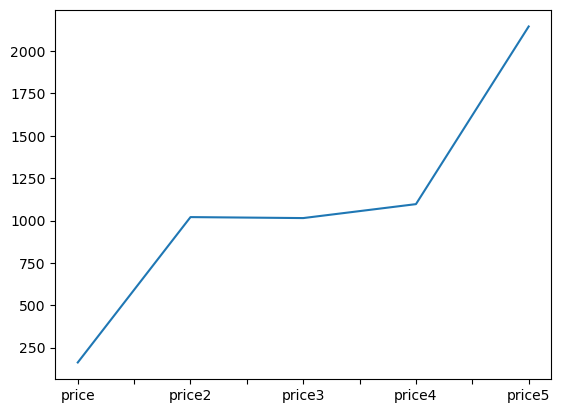

6
9e6229250fedbe05838fef417b74e7fb


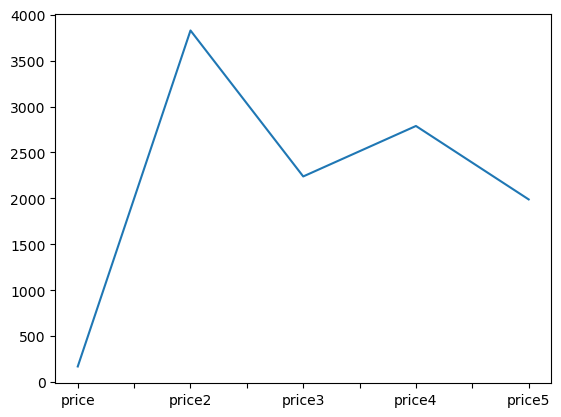

7
65febd49fd28ec955651299159b1f527


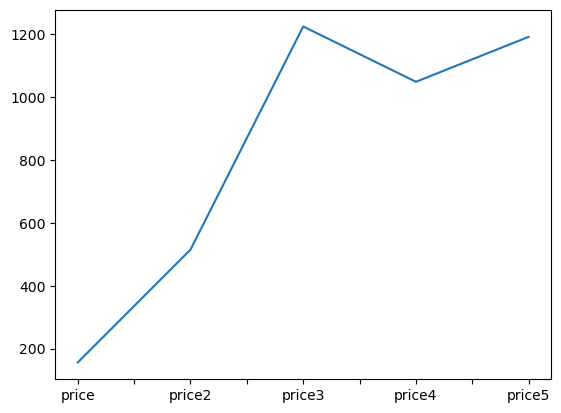

8
02f623a8eb246f3c5f7c2f96462654e6


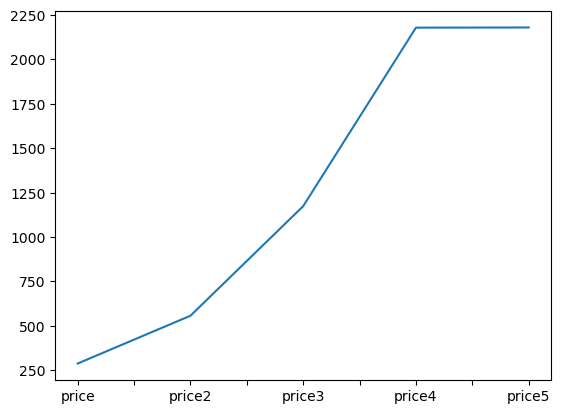

9
903037660cf848a717166eb7a06d616e


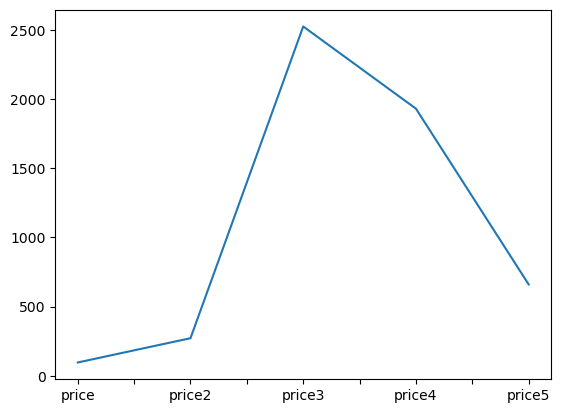

10
17e34d8224d27a541263c4c64b11a56b


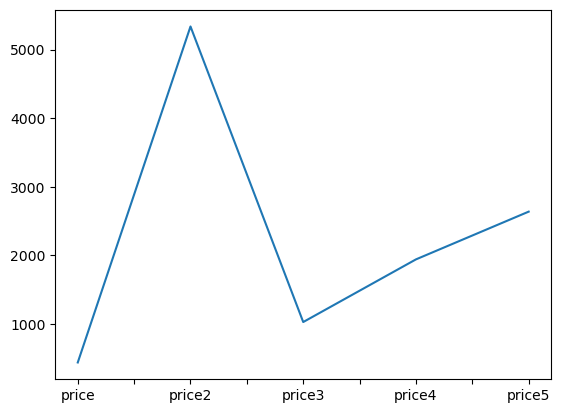

11
b39d7fe263ef469605dbb32608aee0af


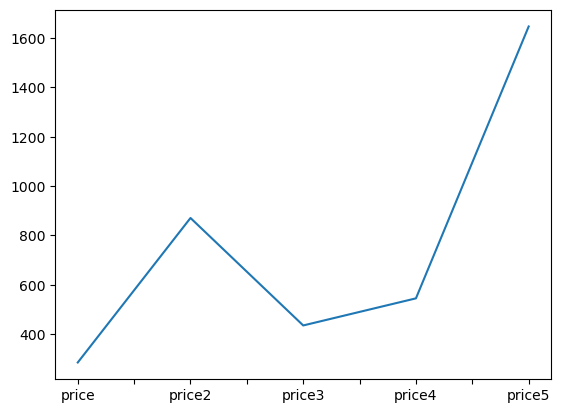

12
01fdefa7697d26ad920e9e0346d4bd1b


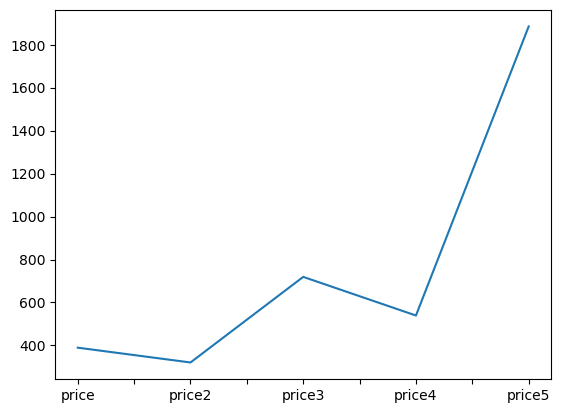

13
2d2c62bef4c8ba0dd74e0e228e808539


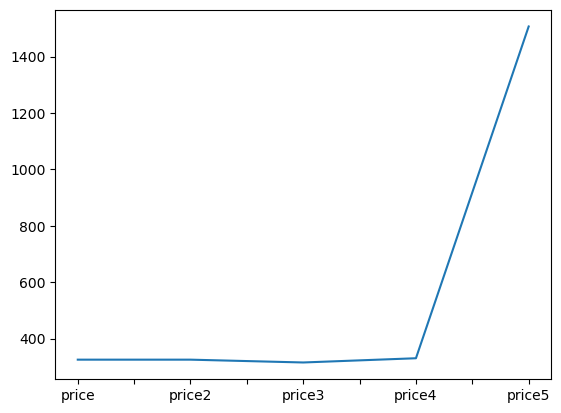

14
951e8cef368f09bb3f3d03c00ca4702c


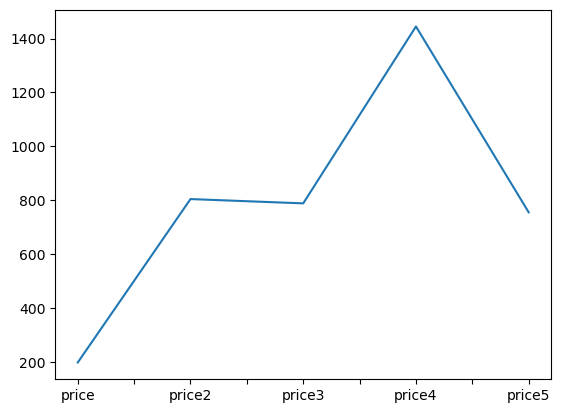

15
b410bdd36d5db7a65dcd42b7ead933b8


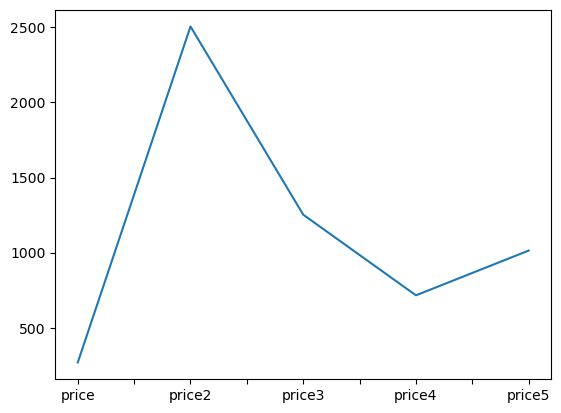

16
056b4ada5bbc2c50cc7842547dda6b51


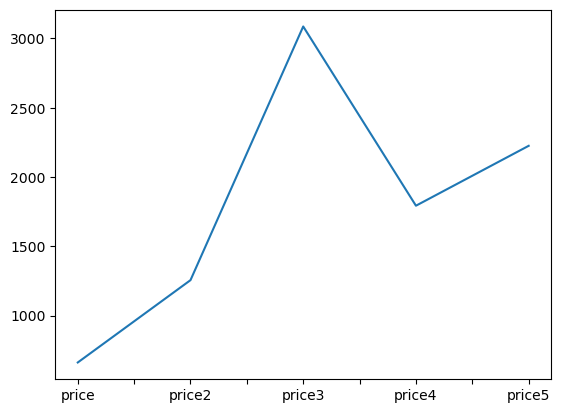

17
52d76513f0c4d97f3b99570e2c94ee31


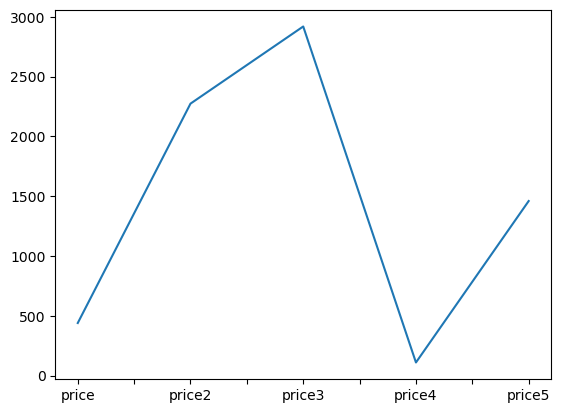

18
6860153b69cc696d5dcfe1cdaaafcf62


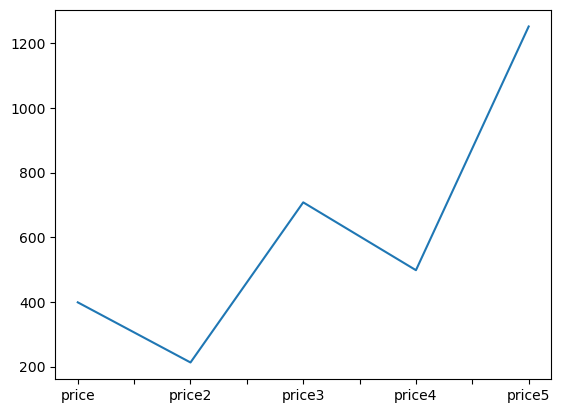

19
8090490573c6c0aa343a7231ebcb8c86


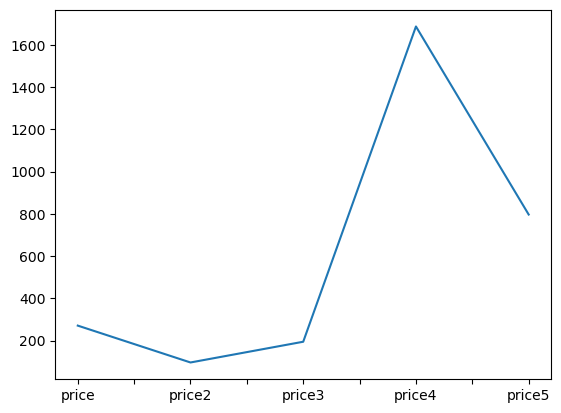

20
e8b4225284fbb02d16f200513f1f395d


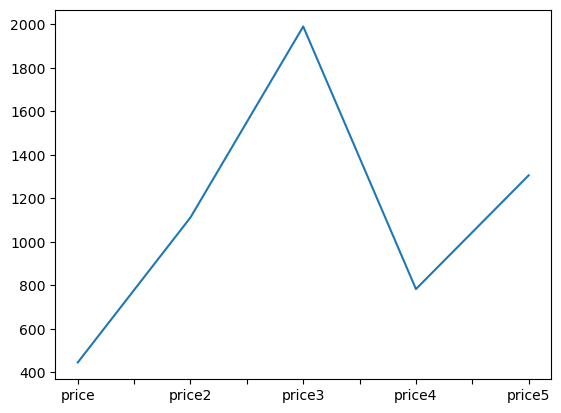

21
7299e27ed73d2ad986de7f7c77d919fa


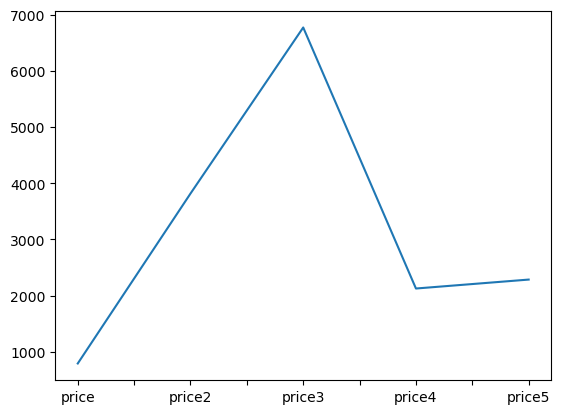

22
7202e2ba20579a9bd1acb29e61fe71f6


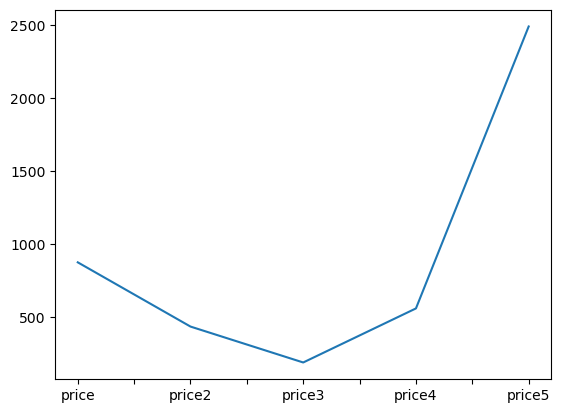

23
9f505651f4a6abe901a56cdc21508025


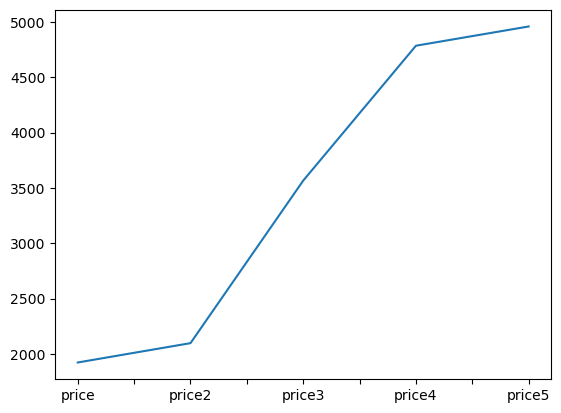

24
8a432f4e5b471f8da497d7dc517666e2


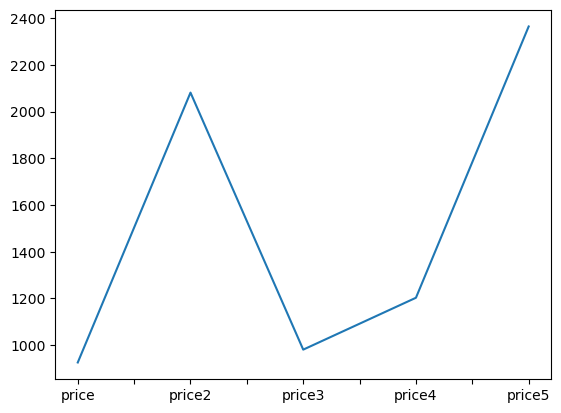

25
4b9750c8ad28220fe6702d4ecb7c898f


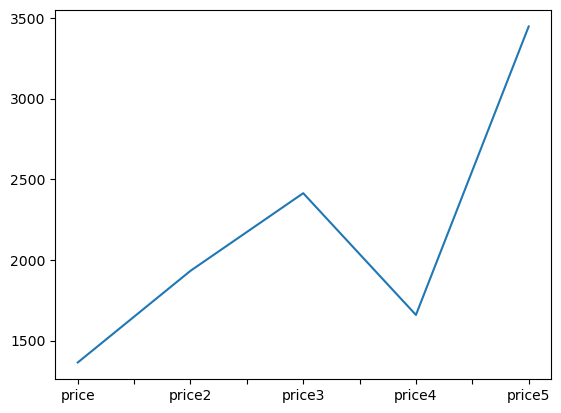

26
06a2c3af7b3aee5d69171b0e14f0ee87


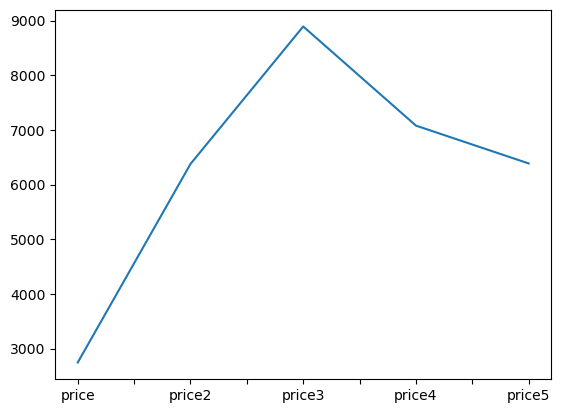

27
f80edd2c5aaa505cc4b0a3b219abf4b8


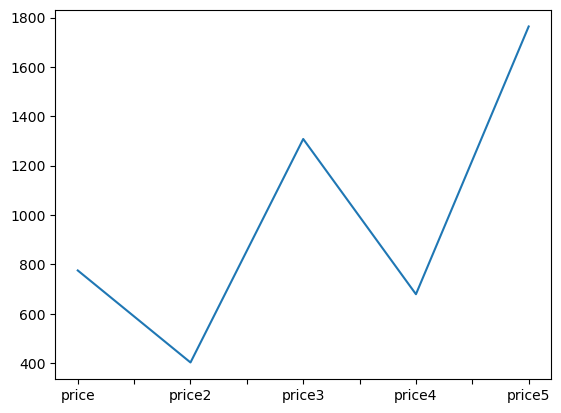

28
b561927807645834b59ef0d16ba55a24


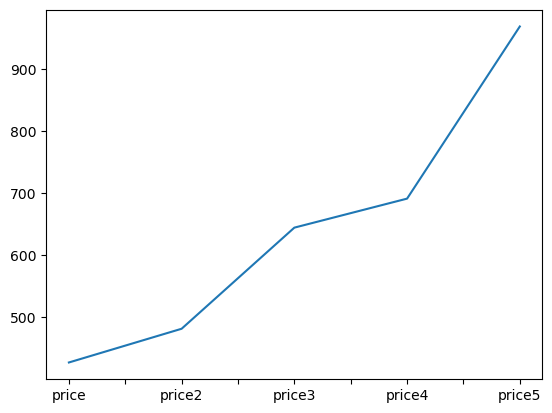

29
6560211a19b47992c3666cc44a7e94c0


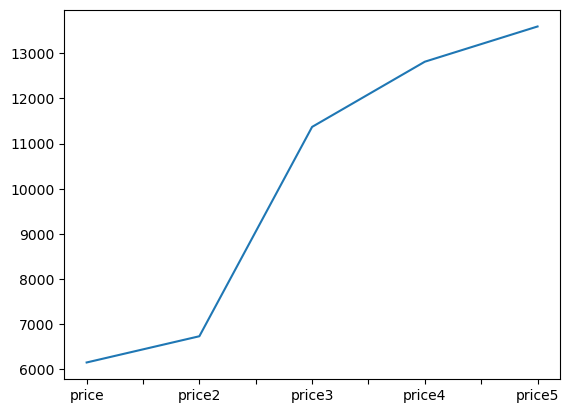

30
4bfc7a4a1cf8d4d2121c27422d9e50b5


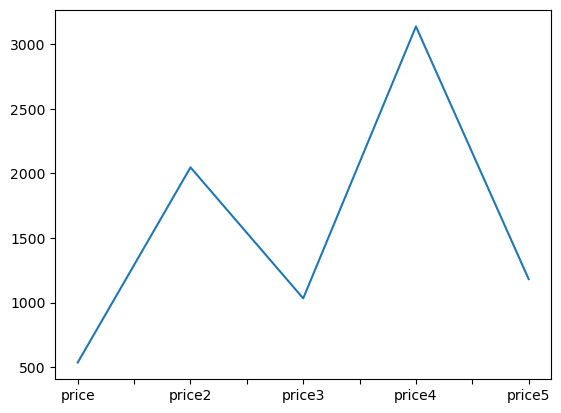

31
640e21a7d01df7614a3b4923e990d40c


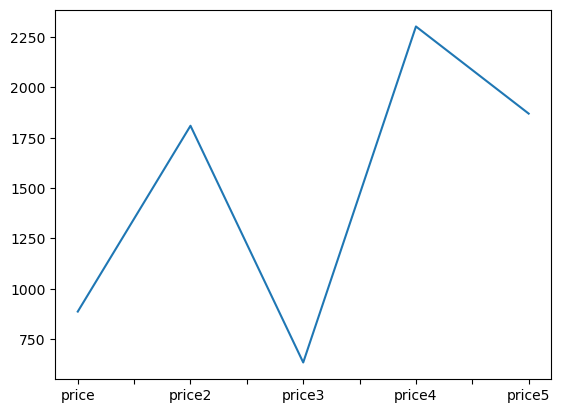

32
ff063b022a9a0aab91bad2c9088760b7


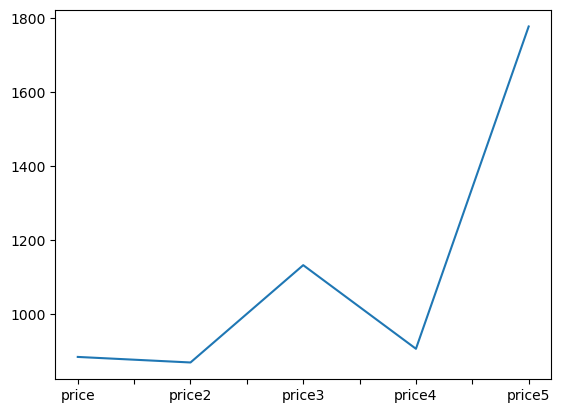

In [146]:
#調查賣家每月銷售狀況
count=0
for seller in potential_sellers1.index:
    potential_sellers.loc[seller][['price','price2','price3','price4','price5']].plot()
    print(count)
    print(seller)
    plt.show()
    count+=1

In [147]:
#篩選掉不符合條件的
drop_index=potential_sellers1.iloc[[3,4,6,9,10,13,14,15,17,19,20,21,24,26,27,30,31],:].index
potential_sellers1.drop(drop_index,inplace=True)

/var/folders/_k/522dpxk92713z35xntnykrt40000gn/T/ipykernel_33705/4033976738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potential_sellers_top['categories']=['perfumery','health_beauty','perfumery',


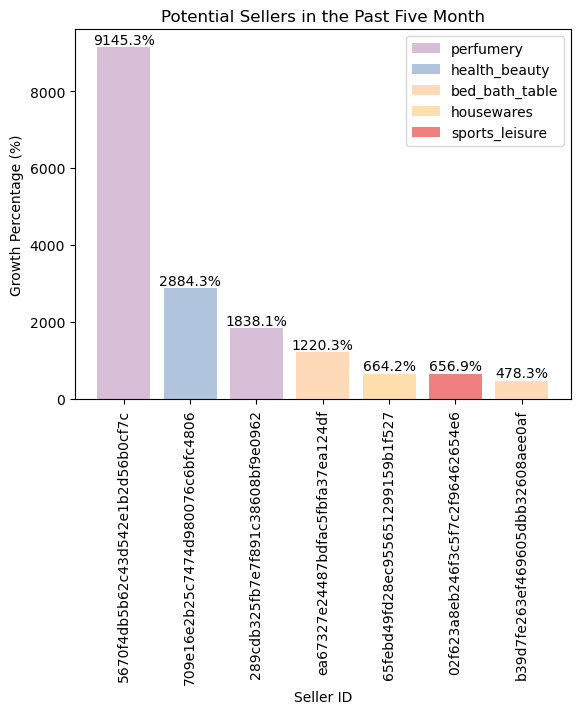

In [149]:
#找出潛力賣家並調查其商品主要類別
potential_sellers_top=potential_sellers1[potential_sellers1['growth_pct']>=471.676794]#以中位數為標準
potential_sellers_top['categories']=['perfumery','health_beauty','perfumery',
                                     'bed_bath_table','housewares','sports_leisure','bed_bath_table']
potential_sellers_top
color_map=['thistle' if x in ['5670f4db5b62c43d542e1b2d56b0cf7c','289cdb325fb7e7f891c38608bf9e0962']
              else 'lightsteelblue' if x =='709e16e2b25c7474d980076c6bfc4806' 
              else 'peachpuff' if x in ['ea67327e24487bdfac5fbfa37ea124df','b39d7fe263ef469605dbb32608aee0af']
              else 'navajowhite' if x =='65febd49fd28ec955651299159b1f527'
              else 'lightcoral' for x in potential_sellers_top.index]
colorlist=['thistle','lightsteelblue','thistle','peachpuff','navajowhite','lightcoral','peachpuff']
color_dict=dict(zip(colorlist,potential_sellers_top['categories'].tolist()))
plt.bar(potential_sellers_top.index,potential_sellers_top['growth_pct'],color=color_map)
plt.title('Potential Sellers in the Past Five Month')
plt.xticks(list(range(0,7)),potential_sellers_top.index,rotation=90)
plt.ylabel('Growth Percentage (%)')
plt.xlabel('Seller ID')
plt.xticks(rotation=90)
for color,label in color_dict.items():
    plt.bar(0,0,color=color, label=label)
plt.legend()
for i,value in enumerate(potential_sellers1[potential_sellers1['growth_pct']>=471.676794]['growth_pct']):
    plt.text(i,value+10,f'{value:.1f}%',ha='center',va='bottom')
plt.show()